# NARDI historical phenotypic barley data analysis

## Load packages, custom functions and data

In [1]:
library(readxl)
library(tidyverse)
library(multtest)
library(asreml)

source("../custom_functions.r")

── Attaching core tidyverse packages ────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ──────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:lubridate’:

    intersect, setdiff, union


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame,

Online License checked out Mon Apr 22 23:16:49 2024


In [2]:
data_total_winter <- preprocess("NARDI_Phenotypic_Historical_Winter_Barley.xlsx")
write_csv(data_total_winter, "NARDI_winter_barley.csv")
genotypes_w <- distinct(data_total_winter["accenumb"]) |> rename("genotype" = "accenumb")
cat("Winter Barley:\n", nrow(data_total_winter), "observations\n", nrow(genotypes_w), "genotypes\n", nrow(distinct(data_total_winter["campaign"])), "campaigns\n\n")
summary(data_total_winter[c("days_to_heading", "plant_height", "thousand_kernel_weight")])

Winter Barley:
 5826 observations
 880 genotypes
 57 campaigns



 days_to_heading  plant_height   thousand_kernel_weight
 Min.   :  0.0   Min.   : 42.0   Min.   : 0.00         
 1st Qu.:124.0   1st Qu.: 90.0   1st Qu.:35.62         
 Median :130.0   Median :114.5   Median :39.81         
 Mean   :129.9   Mean   :107.3   Mean   :39.94         
 3rd Qu.:136.0   3rd Qu.:124.9   3rd Qu.:44.10         
 Max.   :502.0   Max.   :146.0   Max.   :62.40         
 NA's   :776     NA's   :4992    NA's   :1918          

In [3]:
data_total_spring <- preprocess("NARDI_Phenotypic_Historical_Spring_Barley.xlsx")
write_csv(data_total_spring, "NARDI_spring_barley.csv")
genotypes_s <- distinct(data_total_spring["accenumb"]) |> rename("genotype" = "accenumb")
cat("Spring Barley:\n", nrow(data_total_spring), "observations\n", nrow(genotypes_s), "genotypes\n", nrow(distinct(data_total_spring["campaign"])), "campaigns\n\n")
summary(data_total_spring[c("days_to_heading", "plant_height", "thousand_kernel_weight")])

Spring Barley:
 1633 observations
 501 genotypes
 47 campaigns



 days_to_heading  plant_height    thousand_kernel_weight
 Min.   : 95.0   Min.   :  0.00   Min.   :23.60         
 1st Qu.:147.0   1st Qu.: 68.50   1st Qu.:36.60         
 Median :153.0   Median : 77.00   Median :41.30         
 Mean   :150.6   Mean   : 76.58   Mean   :40.42         
 3rd Qu.:156.0   3rd Qu.: 85.00   3rd Qu.:44.20         
 Max.   :189.0   Max.   :118.67   Max.   :58.00         
 NA's   :639     NA's   :736      NA's   :1238          

## Subset data, remove missing values and singletons, make factors

In [4]:
cat("Winter:\n")
data_sub_WB_HT <- data_total_winter |> make_data_sub("days_to_heading")
data_sub_WB_PH <- data_total_winter |> make_data_sub("plant_height")
data_sub_WB_TKW <- data_total_winter |> make_data_sub("thousand_kernel_weight")

Winter:
3674 days_to_heading rows kept
291 plant_height rows kept
3451 thousand_kernel_weight rows kept


In [5]:
cat("Spring:\n")
data_sub_SB_HT <- data_total_spring |> make_data_sub("days_to_heading")
data_sub_SB_PH <- data_total_spring |> make_data_sub("plant_height")
data_sub_SB_TKW <- data_total_spring |> make_data_sub("thousand_kernel_weight")

Spring:
528 days_to_heading rows kept
464 plant_height rows kept
282 thousand_kernel_weight rows kept


## Visualise trait values 

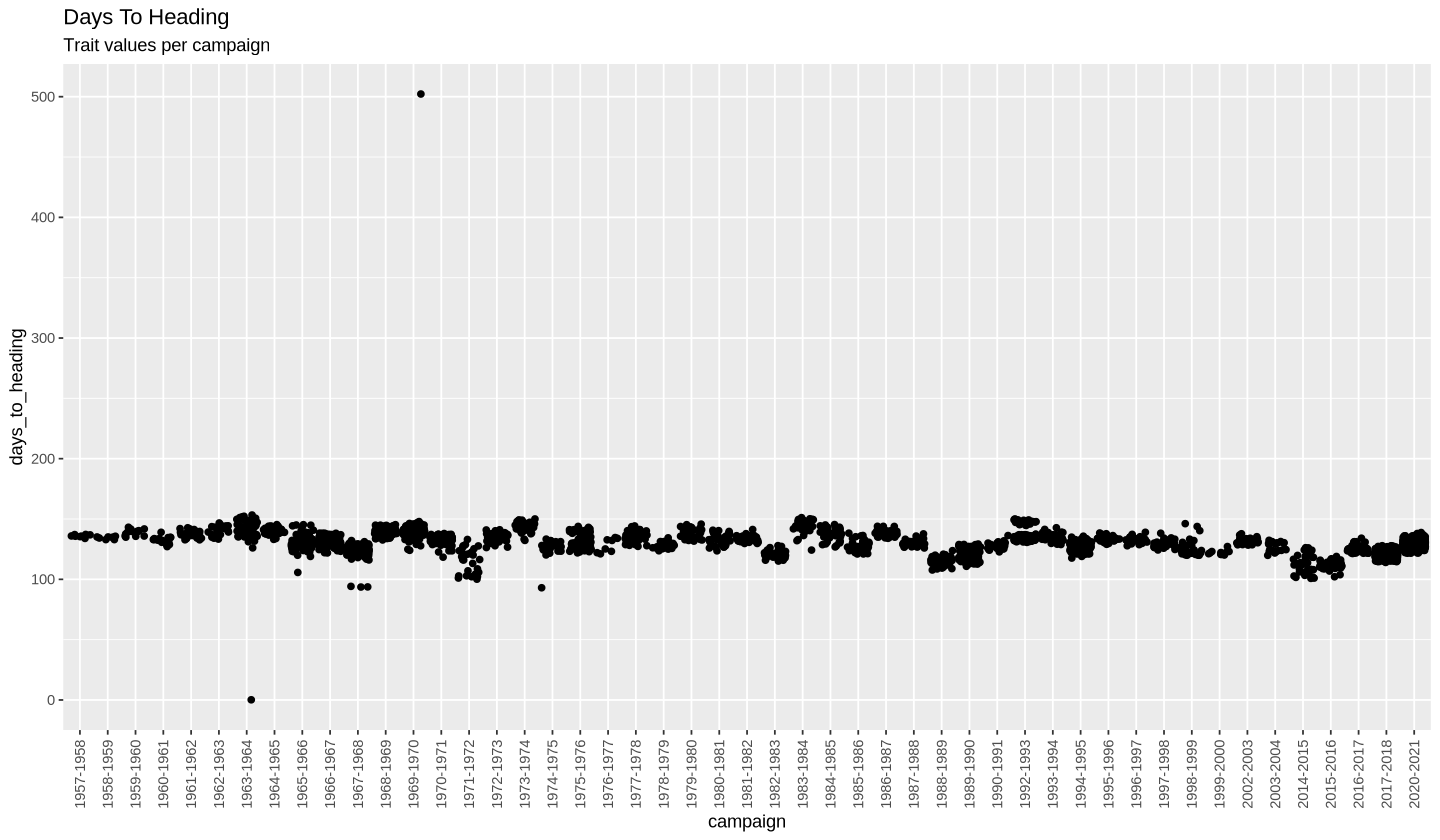

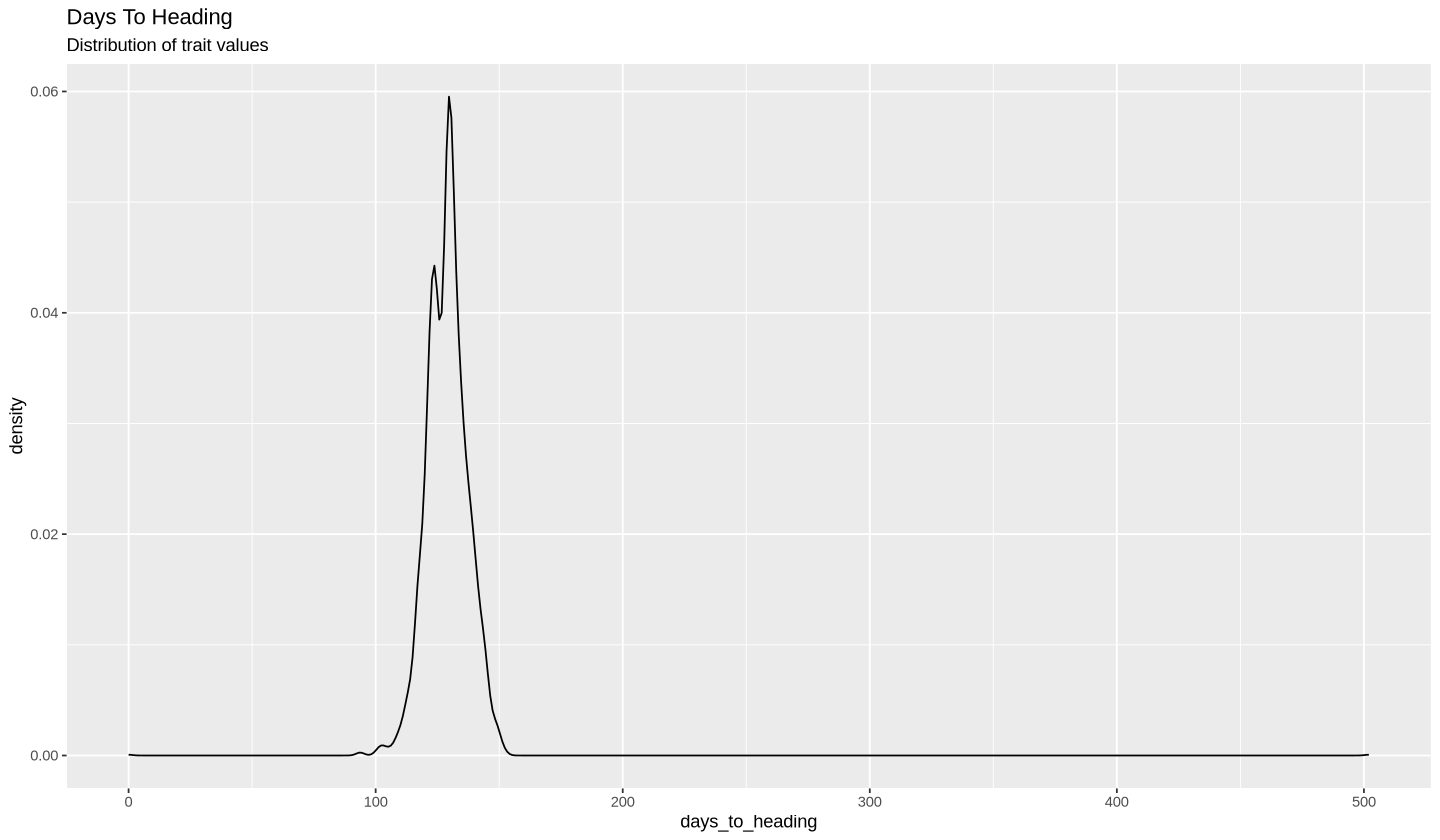

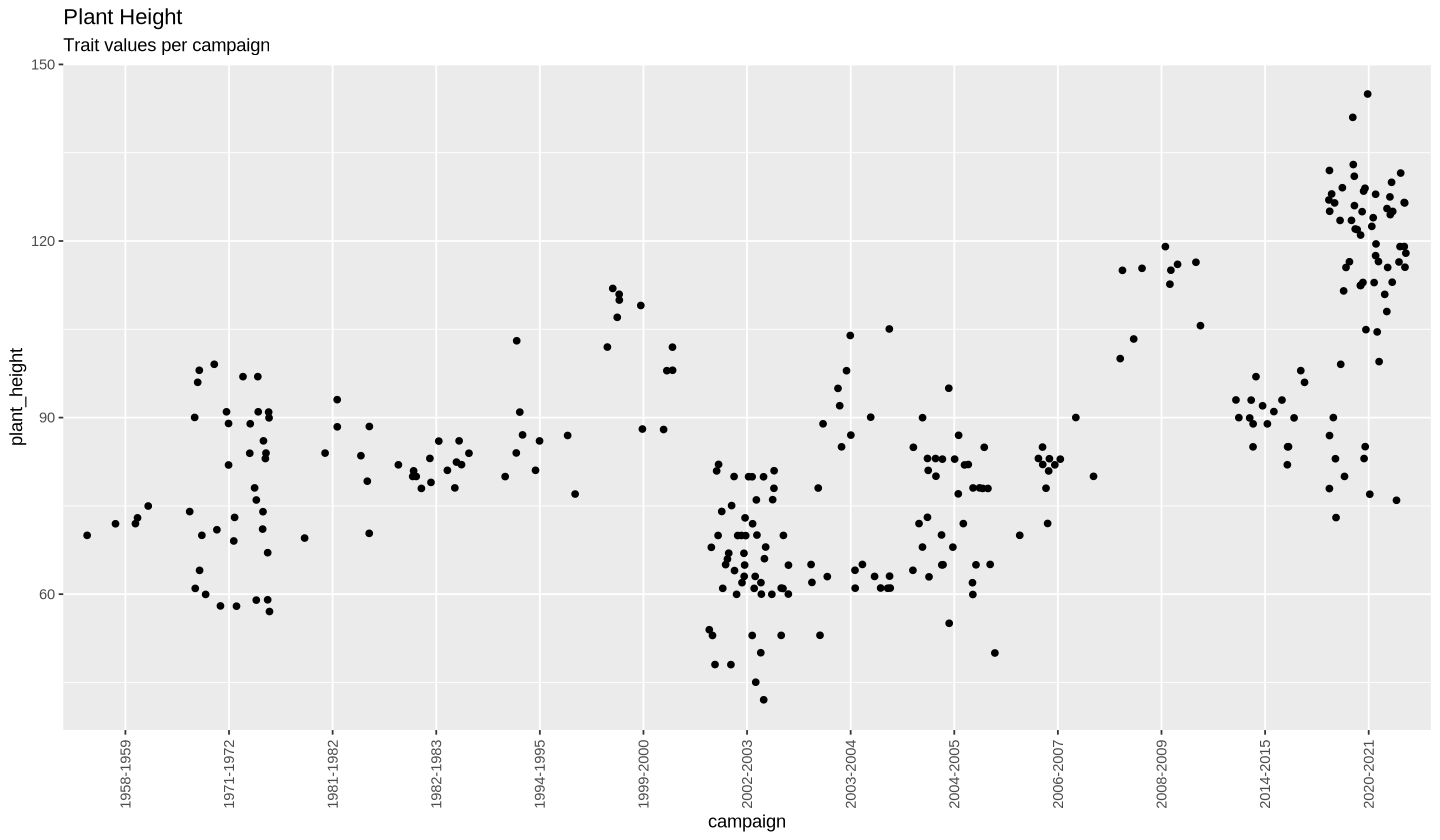

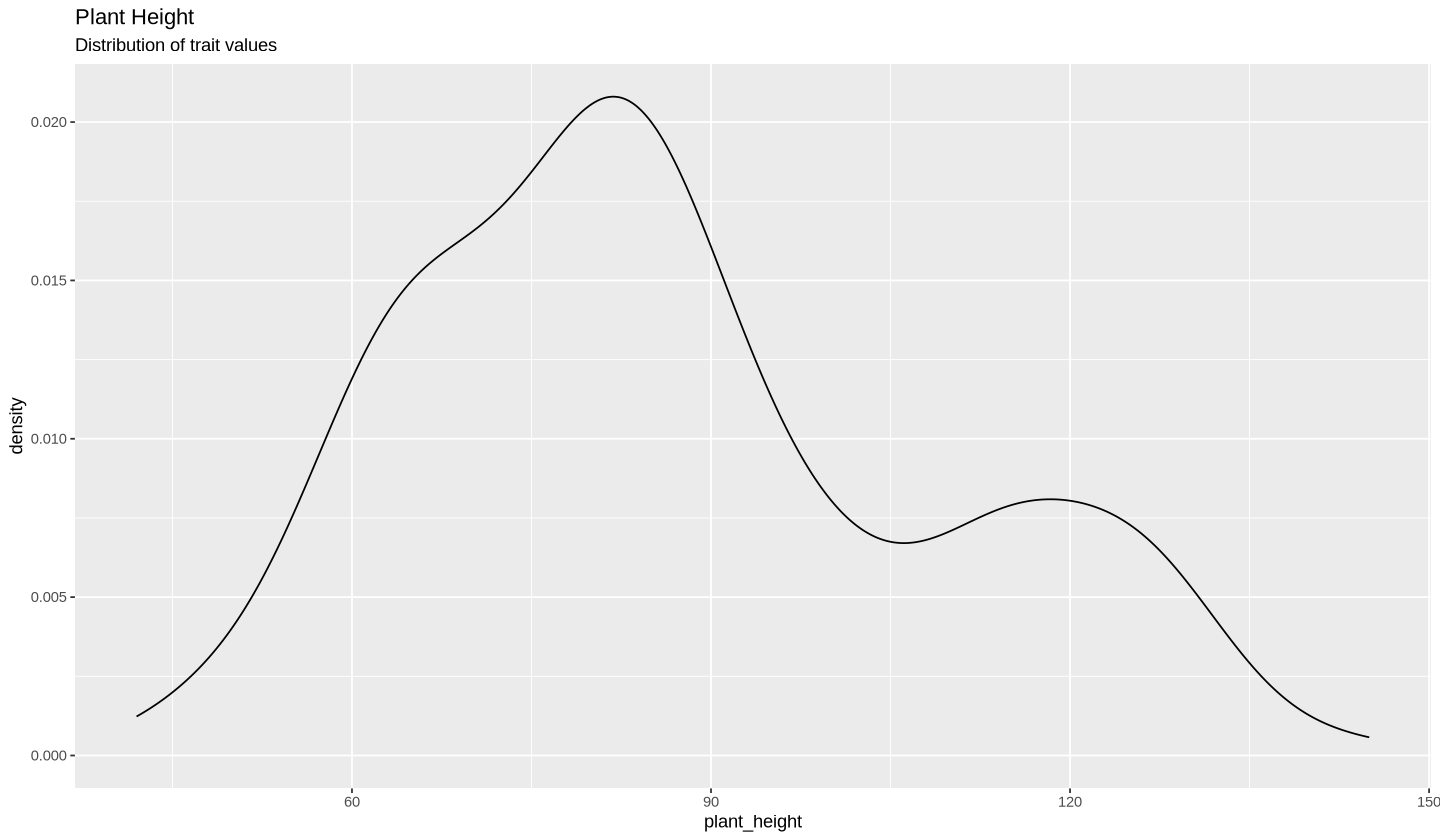

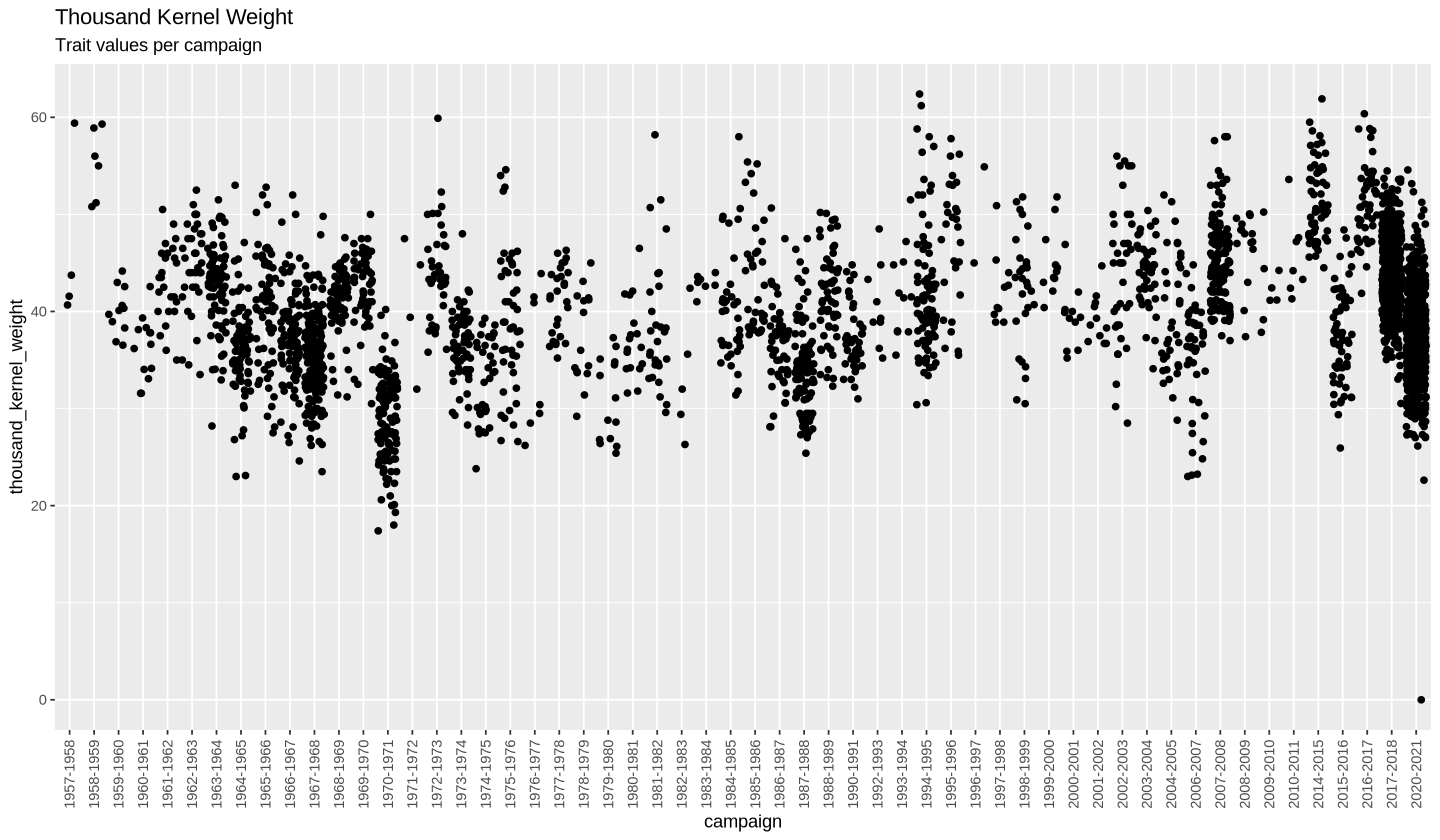

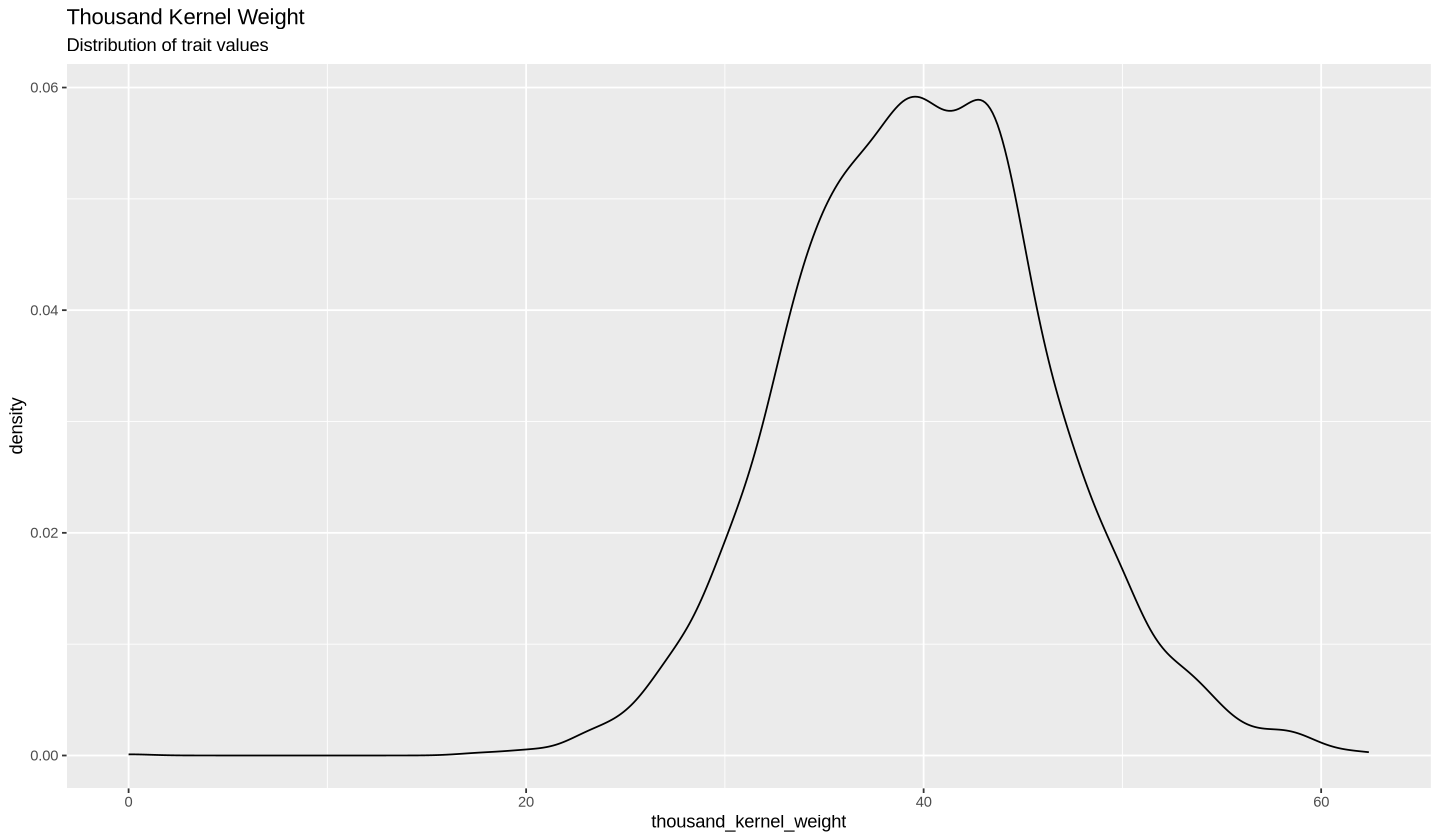

In [6]:
options(repr.plot.width=12, repr.plot.height=7)
data_sub_WB_HT |> visualise_trait(geom_density())
data_sub_WB_PH |> visualise_trait(geom_density())
data_sub_WB_TKW |> visualise_trait(geom_density())

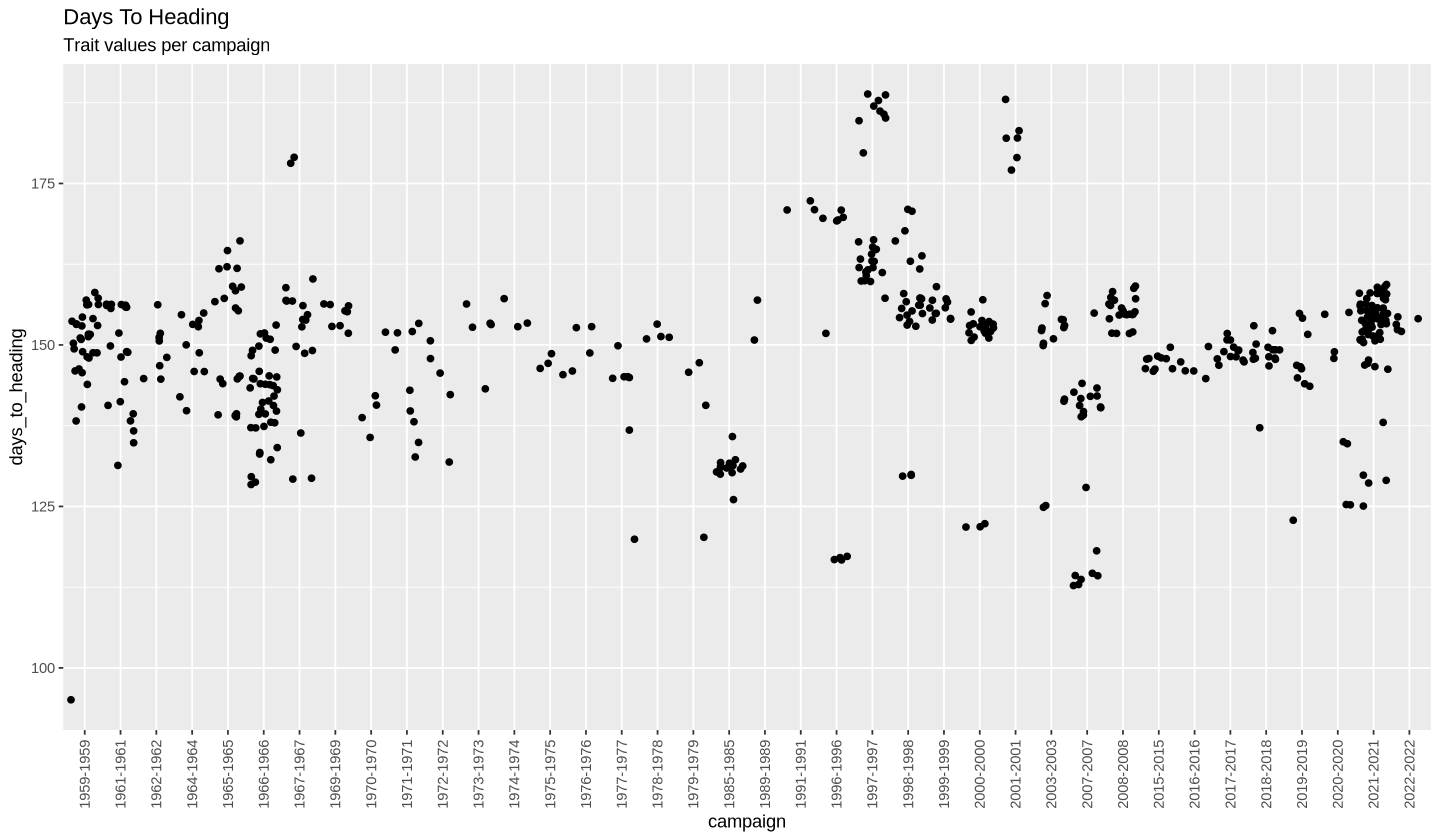

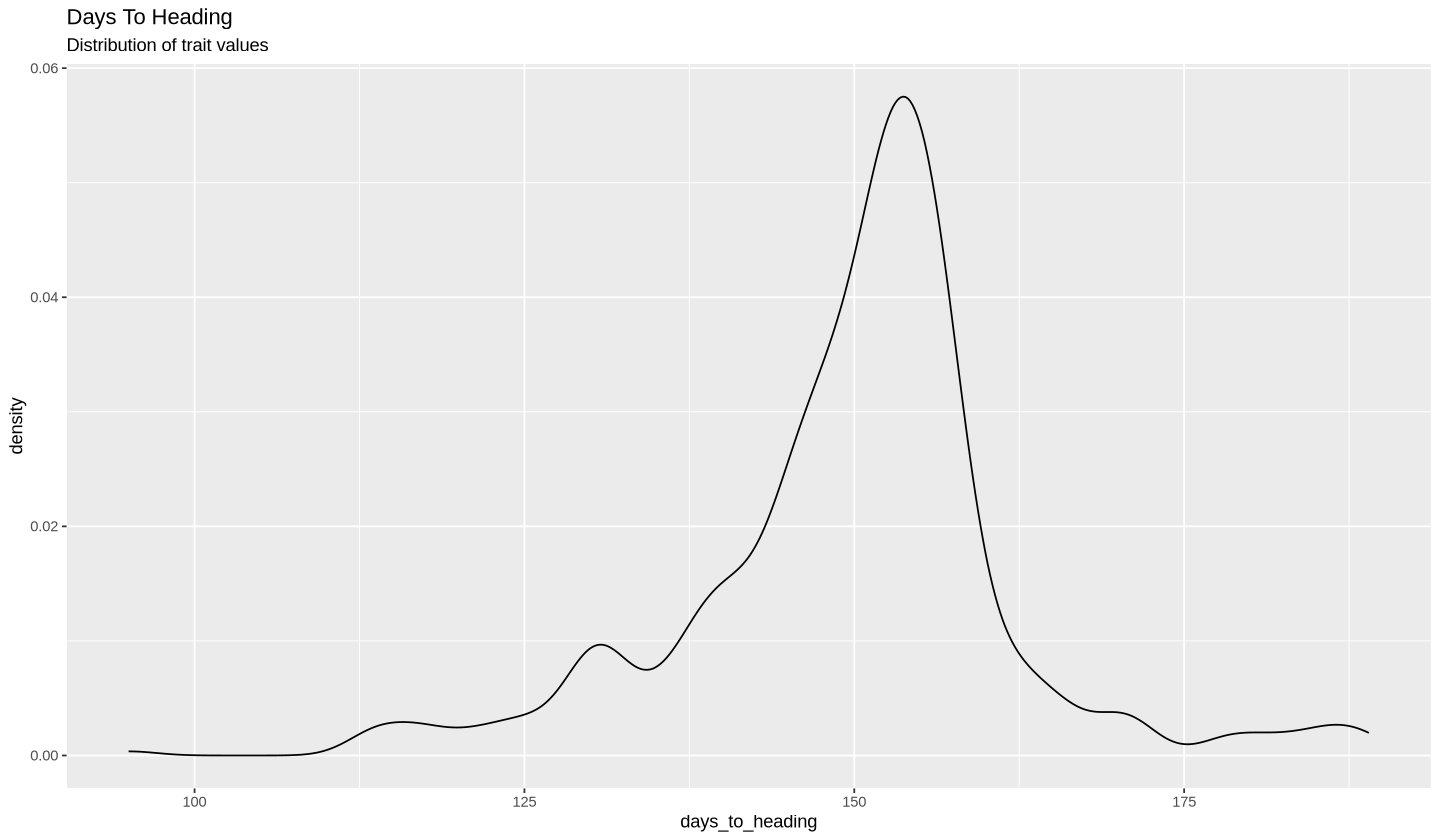

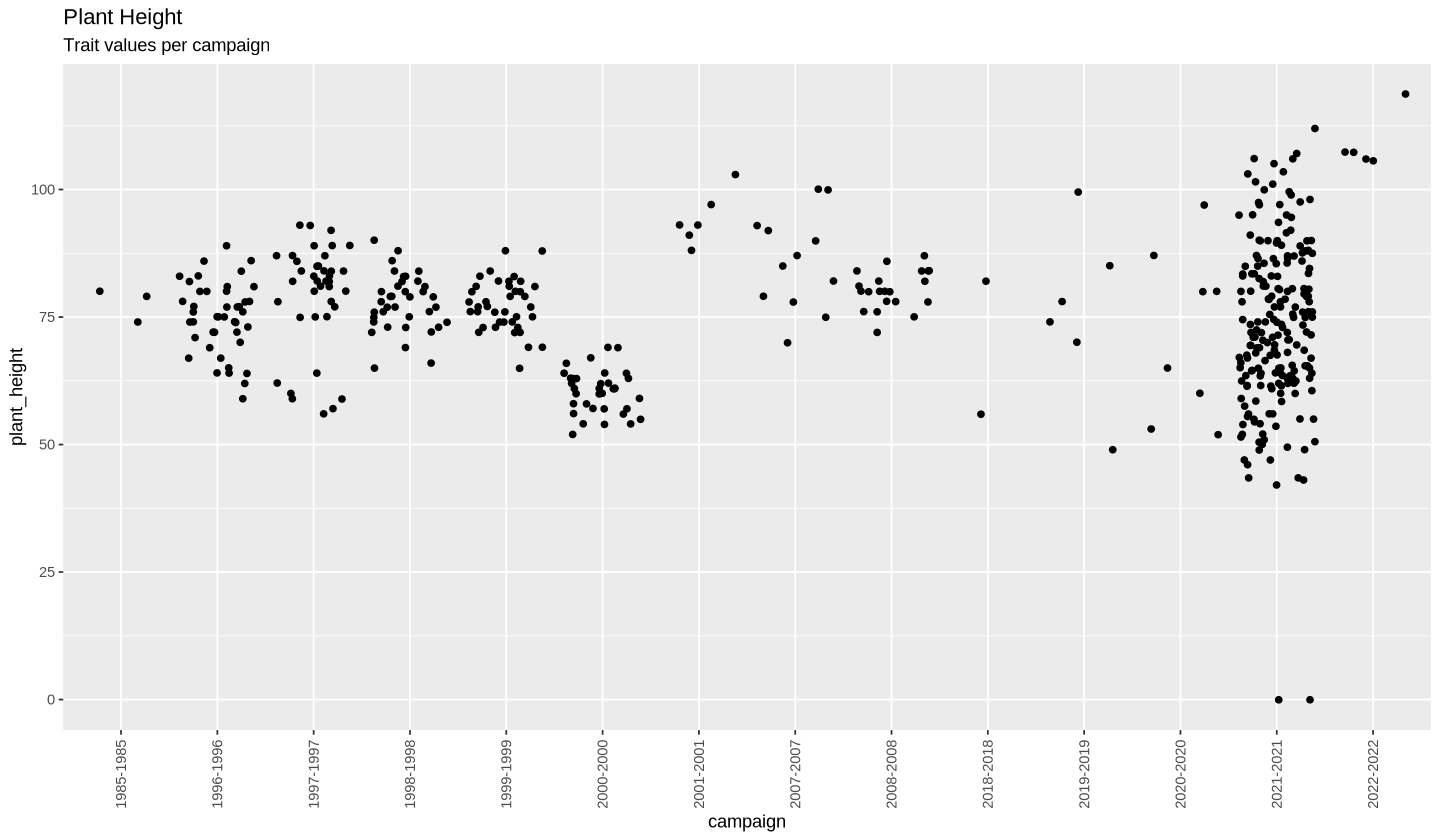

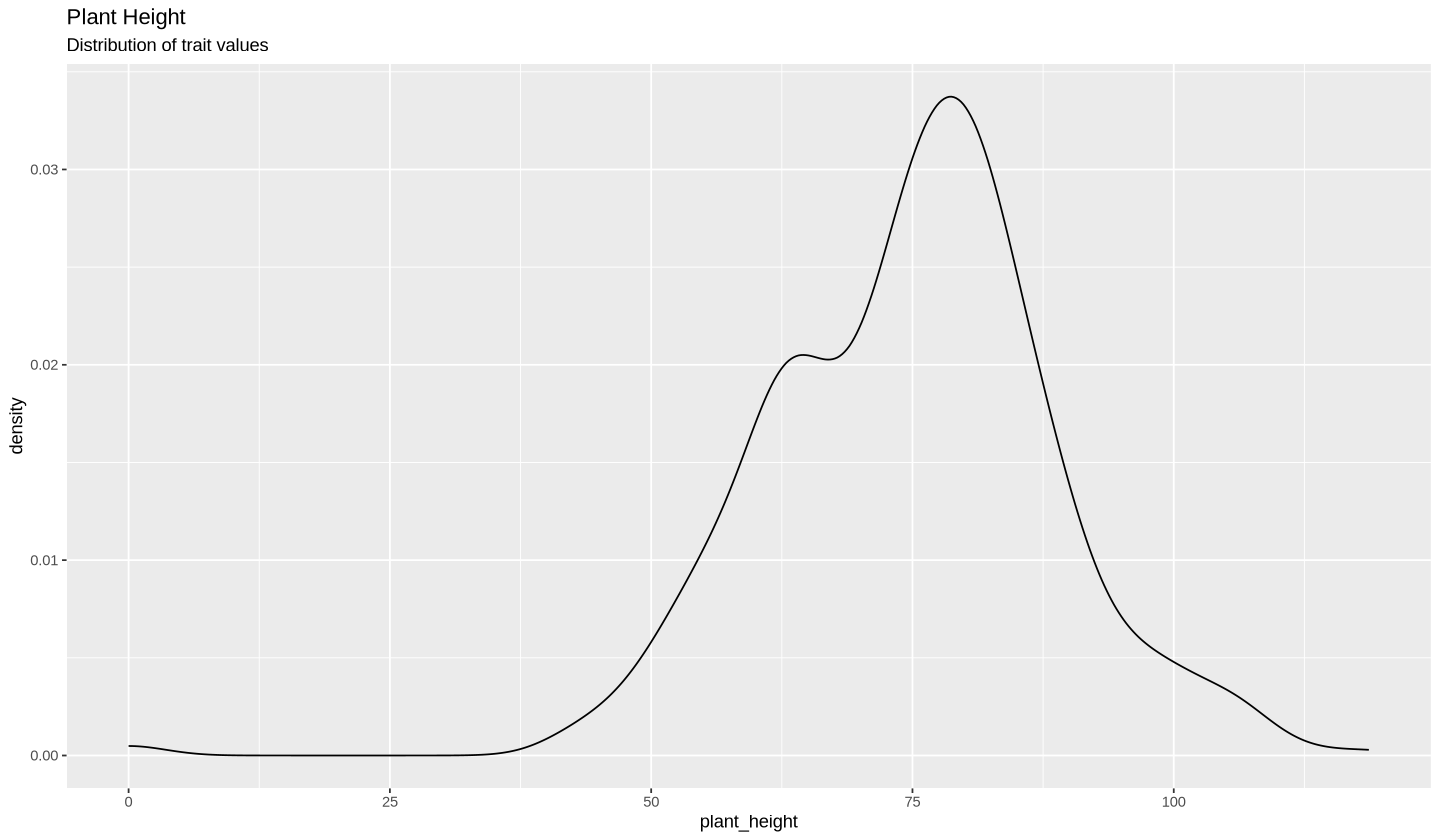

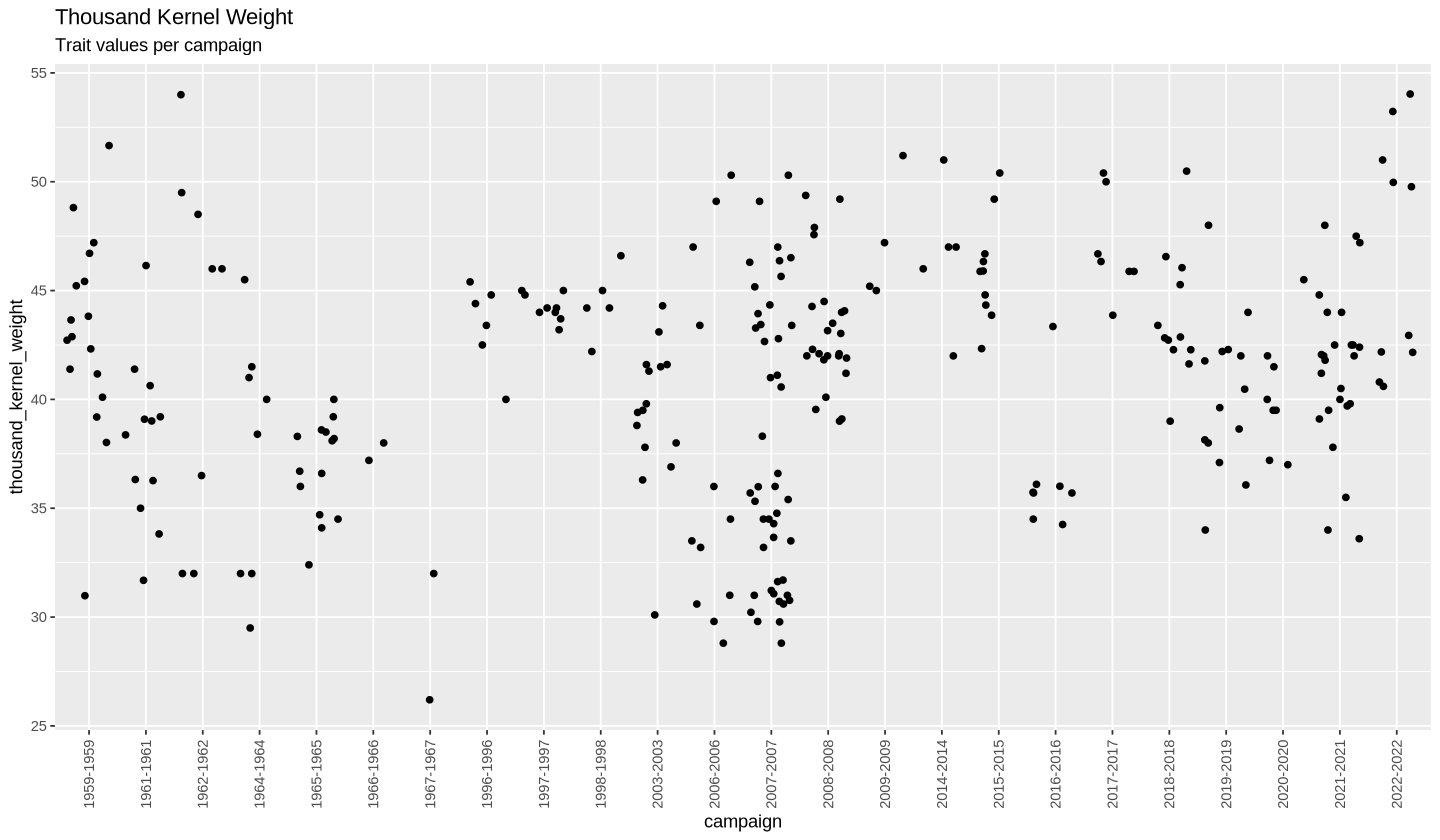

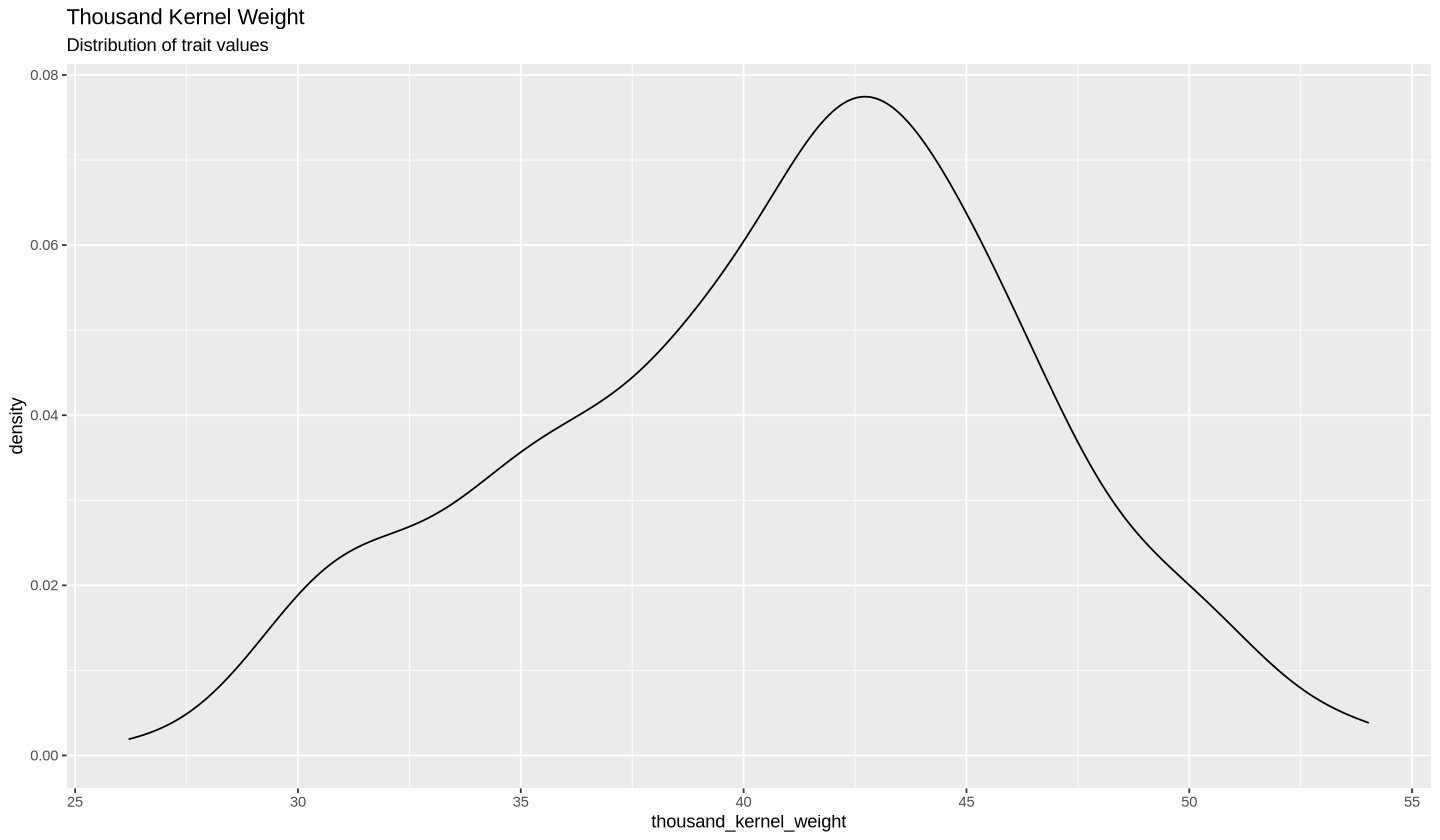

In [7]:
data_sub_SB_HT |> visualise_trait(geom_density())
data_sub_SB_PH |> visualise_trait(geom_density())
data_sub_SB_TKW |> visualise_trait(geom_density())

## Extract and format the campaign effects

In [8]:
asreml_campaign_WB_HT <- asreml(fixed = days_to_heading ~campaign, random = ~accenumb, 
                             na.action = na.method(x="omit", y="omit"), residual = ~dsum(~id(units) | campaign),
                             data = data_sub_WB_HT)

Online License checked out Mon Apr 22 23:16:52 2024
Multi-section model using the sigma parameterization.
ASReml 4.1.0 Mon Apr 22 23:16:52 2024
          LogLik        Sigma2     DF     wall    cpu
 1     -6571.668           1.0   3625 23:16:53    0.0
 2     -6477.906           1.0   3625 23:16:53    0.0
 3     -6402.360           1.0   3625 23:16:53    0.0
 4     -6375.554           1.0   3625 23:16:53    0.0
 5     -6371.258           1.0   3625 23:16:53    0.0
 6     -6371.202           1.0   3625 23:16:53    0.0
 7     -6371.202           1.0   3625 23:16:53    0.0


In [9]:
asreml_campaign_WB_PH <- asreml(fixed = plant_height ~campaign, random = ~accenumb,
                             na.action = na.method(x="omit", y="omit"), residual = ~dsum(~id(units) | campaign), 
                             data = data_sub_WB_PH)

Multi-section model using the sigma parameterization.
ASReml 4.1.0 Mon Apr 22 23:16:53 2024
          LogLik        Sigma2     DF     wall    cpu
 1      -837.879           1.0    278 23:16:53    0.0 (1 restrained)
 2      -822.164           1.0    278 23:16:53    0.0 (1 restrained)
 3      -807.170           1.0    278 23:16:53    0.0 (1 restrained)
 4      -801.683           1.0    278 23:16:53    0.0
 5      -800.631           1.0    278 23:16:53    0.0
 6      -800.605           1.0    278 23:16:53    0.0
 7      -800.603           1.0    278 23:16:53    0.0


Warning message in asreml(fixed = plant_height ~ campaign, random = ~accenumb, na.action = na.method(x = "omit", :
“Some components changed by more than 1% on the last iteration.”


In [10]:
asreml_campaign_WB_TKW <- asreml(fixed = thousand_kernel_weight ~campaign, random = ~accenumb,
                              na.action = na.method(x="omit", y="omit"), residual = ~dsum(~id(units) | campaign), 
                              data = data_sub_WB_TKW)

Multi-section model using the sigma parameterization.
ASReml 4.1.0 Mon Apr 22 23:16:53 2024
          LogLik        Sigma2     DF     wall    cpu
 1     -6683.629           1.0   3395 23:16:53    0.0
 2     -6571.166           1.0   3395 23:16:53    0.0
 3     -6465.495           1.0   3395 23:16:53    0.0
 4     -6410.389           1.0   3395 23:16:53    0.0
 5     -6389.004           1.0   3395 23:16:53    0.0
 6     -6381.893           1.0   3395 23:16:53    0.0
 7     -6378.937           1.0   3395 23:16:53    0.0
 8     -6377.956           1.0   3395 23:16:53    0.0
 9     -6377.754           1.0   3395 23:16:53    0.0
10     -6377.738           1.0   3395 23:16:53    0.0
11     -6377.738           1.0   3395 23:16:53    0.0


In [11]:
asreml_campaign_SB_HT <- asreml(fixed = days_to_heading ~campaign, random = ~accenumb, 
                              na.action = na.method(x="omit", y="omit"), residual = ~dsum(~id(units) | campaign),
                              data = data_sub_SB_HT)

Multi-section model using the sigma parameterization.
ASReml 4.1.0 Mon Apr 22 23:16:53 2024
          LogLik        Sigma2     DF     wall    cpu
 1     -1241.481           1.0    490 23:16:54    0.0 (1 restrained)
 2     -1220.306           1.0    490 23:16:54    0.0 (1 restrained)
 3     -1201.020           1.0    490 23:16:54    0.0 (1 restrained)
 4     -1192.850           1.0    490 23:16:54    0.0 (1 restrained)
 5     -1191.163           1.0    490 23:16:54    0.0 (1 restrained)
 6     -1191.081           1.0    490 23:16:54    0.0 (1 restrained)
 7     -1191.070           1.0    490 23:16:54    0.0 (1 restrained)
 8     -1191.065           1.0    490 23:16:54    0.0 (1 restrained)
 9     -1191.062           1.0    490 23:16:54    0.0
10     -1191.061           1.0    490 23:16:54    0.0
11     -1191.060           1.0    490 23:16:54    0.0
12     -1191.059           1.0    490 23:16:54    0.0


Warning message in asreml(fixed = days_to_heading ~ campaign, random = ~accenumb, :
“Some components changed by more than 1% on the last iteration.”


In [12]:
asreml_campaign_SB_PH <- asreml(fixed = plant_height ~campaign, random = ~accenumb,
                             na.action = na.method(x="omit", y="omit"), residual = ~dsum(~id(units) | campaign), 
                             data = data_sub_SB_PH)

Multi-section model using the sigma parameterization.
ASReml 4.1.0 Mon Apr 22 23:16:54 2024
          LogLik        Sigma2     DF     wall    cpu
 1     -1302.230           1.0    450 23:16:54    0.0 (1 restrained)
 2     -1282.740           1.0    450 23:16:54    0.0
 3     -1265.395           1.0    450 23:16:54    0.0
 4     -1257.754           1.0    450 23:16:54    0.0
 5     -1255.459           1.0    450 23:16:54    0.0
 6     -1254.351           1.0    450 23:16:54    0.0
 7     -1253.611           1.0    450 23:16:54    0.0
 8     -1253.298           1.0    450 23:16:54    0.0
 9     -1253.211           1.0    450 23:16:54    0.0
10     -1253.193           1.0    450 23:16:54    0.0
11     -1253.190           1.0    450 23:16:54    0.0
12     -1253.189           1.0    450 23:16:54    0.0


In [13]:
asreml_campaign_SB_TKW <- asreml(fixed = thousand_kernel_weight ~campaign, random = ~accenumb,
                              na.action = na.method(x="omit", y="omit"), residual = ~dsum(~id(units) | campaign), 
                              data = data_sub_SB_TKW)

Multi-section model using the sigma parameterization.
ASReml 4.1.0 Mon Apr 22 23:16:54 2024
          LogLik        Sigma2     DF     wall    cpu
 1      -511.514           1.0    258 23:16:54    0.0
 2      -500.088           1.0    258 23:16:54    0.0
 3      -488.864           1.0    258 23:16:54    0.0
 4      -482.525           1.0    258 23:16:54    0.0 (1 restrained)
 5      -480.895           1.0    258 23:16:54    0.0
 6      -480.184           1.0    258 23:16:54    0.0
 7      -480.024           1.0    258 23:16:54    0.0
 8      -480.004           1.0    258 23:16:54    0.0
 9      -480.003           1.0    258 23:16:54    0.0


Warning message in asreml(fixed = thousand_kernel_weight ~ campaign, random = ~accenumb, :
“Some components changed by more than 1% on the last iteration.”


In [14]:
campaign_effect_WB_HT <- get_campaign_effect(asreml_campaign_WB_HT)
campaign_effect_WB_PH <- get_campaign_effect(asreml_campaign_WB_PH)
campaign_effect_WB_TKW <- get_campaign_effect(asreml_campaign_WB_TKW)

In [15]:
campaign_effect_SB_HT <- get_campaign_effect(asreml_campaign_SB_HT)
campaign_effect_SB_PH <- get_campaign_effect(asreml_campaign_SB_PH)
campaign_effect_SB_TKW <- get_campaign_effect(asreml_campaign_SB_TKW)

## Extract heterogeneous error variances

In [16]:
error_var_WB_HT <- get_error_var(asreml_campaign_WB_HT)
error_var_WB_PH <- get_error_var(asreml_campaign_WB_PH)
error_var_WB_TKW <- get_error_var(asreml_campaign_WB_TKW)

In [17]:
error_var_SB_HT <- get_error_var(asreml_campaign_SB_HT)
error_var_SB_PH <- get_error_var(asreml_campaign_SB_PH)
error_var_SB_TKW <- get_error_var(asreml_campaign_SB_TKW)

## Calculate and standardize the coefficient of variation (CV)

In [18]:
CV_df_WB_HT <- make_CV_df(campaign_effect_WB_HT, error_var_WB_HT)
CV_df_WB_PH <- make_CV_df(campaign_effect_WB_PH, error_var_WB_PH)
CV_df_WB_TKW <- make_CV_df(campaign_effect_WB_TKW, error_var_WB_TKW)

In [19]:
CV_df_SB_HT <- make_CV_df(campaign_effect_SB_HT, error_var_SB_HT)
CV_df_SB_PH <- make_CV_df(campaign_effect_SB_PH, error_var_SB_PH)
CV_df_SB_TKW <- make_CV_df(campaign_effect_SB_TKW, error_var_SB_TKW)

## Remove outlier campaigns

In [20]:
data_corrected_WB_HT_I <- data_sub_WB_HT |> correct_I(CV_df_WB_HT)
data_corrected_WB_PH_I <- data_sub_WB_PH |> correct_I(CV_df_WB_PH)
data_corrected_WB_TKW_I <- data_sub_WB_TKW |> correct_I(CV_df_WB_TKW)

1 outlier campaign(s) detected for trait days_to_heading: 1969-1970 
0 outlier campaign(s) detected for trait plant_height
1 outlier campaign(s) detected for trait thousand_kernel_weight: 1957-1958 


In [21]:
data_corrected_SB_HT_I <- data_sub_SB_HT |> correct_I(CV_df_SB_HT)
data_corrected_SB_PH_I <- data_sub_SB_PH |> correct_I(CV_df_SB_PH)
data_corrected_SB_TKW_I <- data_sub_SB_TKW |> correct_I(CV_df_SB_TKW)

1 outlier campaign(s) detected for trait days_to_heading: 1996-1996 
0 outlier campaign(s) detected for trait plant_height
0 outlier campaign(s) detected for trait thousand_kernel_weight


## Residuals

In [22]:
asreml_res_WB_HT <- asreml(fixed = days_to_heading ~ accenumb, random = ~ campaign,
                 na.action = na.method(x="omit", y="omit"), residual = ~dsum(~id(units) | campaign), 
                 data = data_corrected_WB_HT_I)

Multi-section model using the sigma parameterization.
ASReml 4.1.0 Mon Apr 22 23:16:54 2024
          LogLik        Sigma2     DF     wall    cpu
 1     -5457.234           1.0   2804 23:16:55    0.2
 2     -5320.894           1.0   2804 23:16:55    0.2
 3     -5183.811           1.0   2804 23:16:55    0.2
 4     -5105.114           1.0   2804 23:16:55    0.2
 5     -5070.444           1.0   2804 23:16:55    0.2
 6     -5060.609           1.0   2804 23:16:55    0.2
 7     -5058.537           1.0   2804 23:16:56    0.2
 8     -5058.362           1.0   2804 23:16:56    0.2
 9     -5058.360           1.0   2804 23:16:56    0.2


In [23]:
asreml_res_WB_PH <- asreml(fixed = plant_height ~ accenumb, random = ~ campaign, 
                 na.action = na.method(x="omit", y="omit"), residual = ~dsum(~id(units) | campaign), 
                 data = data_corrected_WB_PH_I)

Multi-section model using the sigma parameterization.
ASReml 4.1.0 Mon Apr 22 23:16:56 2024
          LogLik        Sigma2     DF     wall    cpu
 1      -762.547           1.0    234 23:16:56    0.0 (1 restrained)
 2      -740.826           1.0    234 23:16:56    0.0 (1 restrained)
 3      -719.310           1.0    234 23:16:56    0.0 (1 restrained)
 4      -707.188           1.0    234 23:16:56    0.0 (1 restrained)
 5      -702.278           1.0    234 23:16:56    0.0
 6      -701.168           1.0    234 23:16:56    0.0
 7      -701.014           1.0    234 23:16:56    0.0
 8      -701.008           1.0    234 23:16:56    0.0


In [24]:
asreml_res_WB_TKW <- asreml(fixed = thousand_kernel_weight ~ accenumb, random = ~ campaign, 
                  na.action = na.method(x="omit", y="omit"), residual = ~dsum(~id(units) | campaign), 
                  data = data_corrected_WB_TKW_I)

Multi-section model using the sigma parameterization.
ASReml 4.1.0 Mon Apr 22 23:16:56 2024
          LogLik        Sigma2     DF     wall    cpu
 1     -5659.794           1.0   2762 23:16:57    0.2
 2     -5543.870           1.0   2762 23:16:57    0.1 (1 restrained)
 3     -5425.744           1.0   2762 23:16:57    0.1 (1 restrained)
 4     -5355.669           1.0   2762 23:16:57    0.1 (1 restrained)
 5     -5321.167           1.0   2762 23:16:57    0.1 (1 restrained)
 6     -5308.455           1.0   2762 23:16:57    0.1 (1 restrained)
 7     -5303.875           1.0   2762 23:16:57    0.1
 8     -5302.401           1.0   2762 23:16:57    0.1
 9     -5302.039           1.0   2762 23:16:58    0.1
10     -5301.996           1.0   2762 23:16:58    0.1
11     -5301.995           1.0   2762 23:16:58    0.1


In [25]:
asreml_res_SB_HT <- asreml(fixed = days_to_heading ~ accenumb, random = ~ campaign,
                  na.action = na.method(x="omit", y="omit"), residual = ~dsum(~id(units) | campaign), 
                  data = data_corrected_SB_HT_I)

Multi-section model using the sigma parameterization.
ASReml 4.1.0 Mon Apr 22 23:16:58 2024
          LogLik        Sigma2     DF     wall    cpu
 1     -1192.796           1.0    413 23:16:58    0.0 (1 restrained)
 2     -1142.151           1.0    413 23:16:58    0.0 (1 restrained)
 3     -1088.699           1.0    413 23:16:58    0.0 (1 restrained)
 4     -1054.729           1.0    413 23:16:58    0.0 (2 restrained)
 5     -1036.776           1.0    413 23:16:58    0.0 (2 restrained)
 6     -1031.758           1.0    413 23:16:58    0.0 (2 restrained)
 7     -1030.954           1.0    413 23:16:58    0.0 (1 restrained)
 8     -1030.888           1.0    413 23:16:58    0.0 (2 restrained)
 9     -1030.889           1.0    413 23:16:58    0.0 (1 restrained)
10     -1030.889           1.0    413 23:16:58    0.0 (1 restrained)


Warning message in asreml(fixed = days_to_heading ~ accenumb, random = ~campaign, :
“Some components changed by more than 1% on the last iteration.”


In [26]:
asreml_res_SB_PH <- asreml(fixed = plant_height ~ accenumb, random = ~ campaign, 
                 na.action = na.method(x="omit", y="omit"), residual = ~dsum(~id(units) | campaign), 
                 data = data_corrected_SB_PH_I)

Multi-section model using the sigma parameterization.
ASReml 4.1.0 Mon Apr 22 23:16:58 2024
          LogLik        Sigma2     DF     wall    cpu
 1     -1108.237           1.0    376 23:16:58    0.0 (2 restrained)
 2     -1081.005           1.0    376 23:16:58    0.0
 3     -1055.247           1.0    376 23:16:58    0.0
 4     -1039.826           1.0    376 23:16:58    0.0
 5     -1032.778           1.0    376 23:16:58    0.0
 6     -1030.835           1.0    376 23:16:58    0.0 (1 restrained)
 7     -1030.462           1.0    376 23:16:58    0.0 (1 restrained)
 8     -1030.431           1.0    376 23:16:58    0.0 (1 restrained)
 9     -1030.430           1.0    376 23:16:58    0.0 (1 restrained)


Warning message in asreml(fixed = plant_height ~ accenumb, random = ~campaign, na.action = na.method(x = "omit", :
“Some components changed by more than 1% on the last iteration.”


In [27]:
asreml_res_SB_TKW <- asreml(fixed = thousand_kernel_weight ~ accenumb, random = ~ campaign, 
                  na.action = na.method(x="omit", y="omit"), residual = ~dsum(~id(units) | campaign), 
                  data = data_corrected_SB_TKW_I)

Multi-section model using the sigma parameterization.
ASReml 4.1.0 Mon Apr 22 23:16:58 2024
          LogLik        Sigma2     DF     wall    cpu
 1      -489.348           1.0    224 23:16:58    0.0 (1 restrained)
 2      -467.450           1.0    224 23:16:58    0.0 (2 restrained)
 3      -445.601           1.0    224 23:16:58    0.0 (1 restrained)
 4      -431.954           1.0    224 23:16:58    0.0 (1 restrained)
 5      -426.828           1.0    224 23:16:58    0.0
 6      -425.898           1.0    224 23:16:58    0.0
 7      -425.801           1.0    224 23:16:58    0.0
 8      -425.697           1.0    224 23:16:58    0.0
 9      -425.646           1.0    224 23:16:58    0.0
10      -425.621           1.0    224 23:16:58    0.0
11      -425.613           1.0    224 23:16:58    0.0
12      -425.610           1.0    224 23:16:58    0.0
13      -425.610           1.0    224 23:16:58    0.0


Warning message in asreml(fixed = thousand_kernel_weight ~ accenumb, random = ~campaign, :
“Log-likelihood not converged”
Warning message in asreml(fixed = thousand_kernel_weight ~ accenumb, random = ~campaign, :
“Some components changed by more than 1% on the last iteration.”


73 outlier value(s) detected for trait Days To Heading 
1 outlier value(s) detected for trait Plant Height 


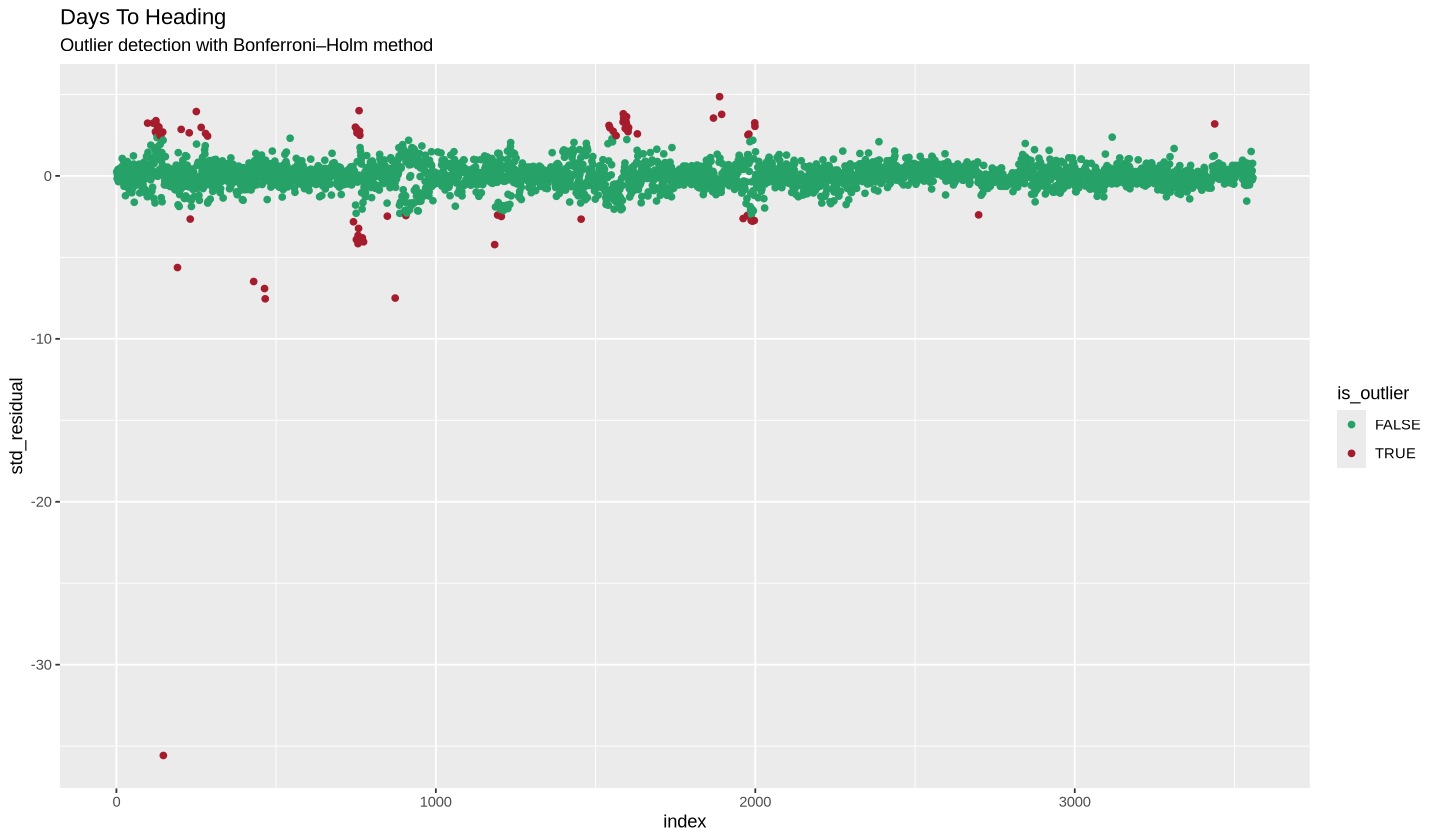

32 outlier value(s) detected for trait Thousand Kernel Weight 


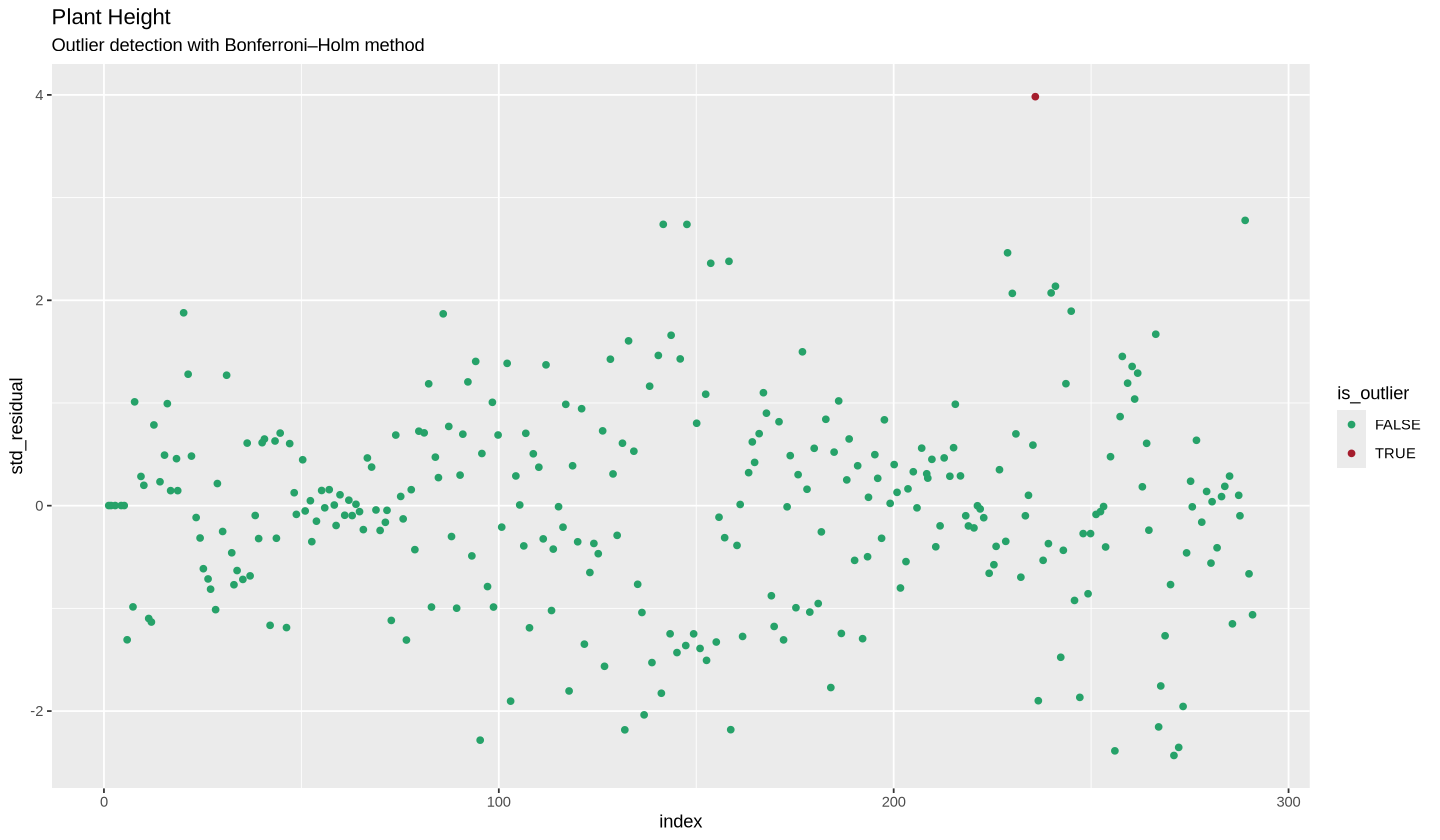

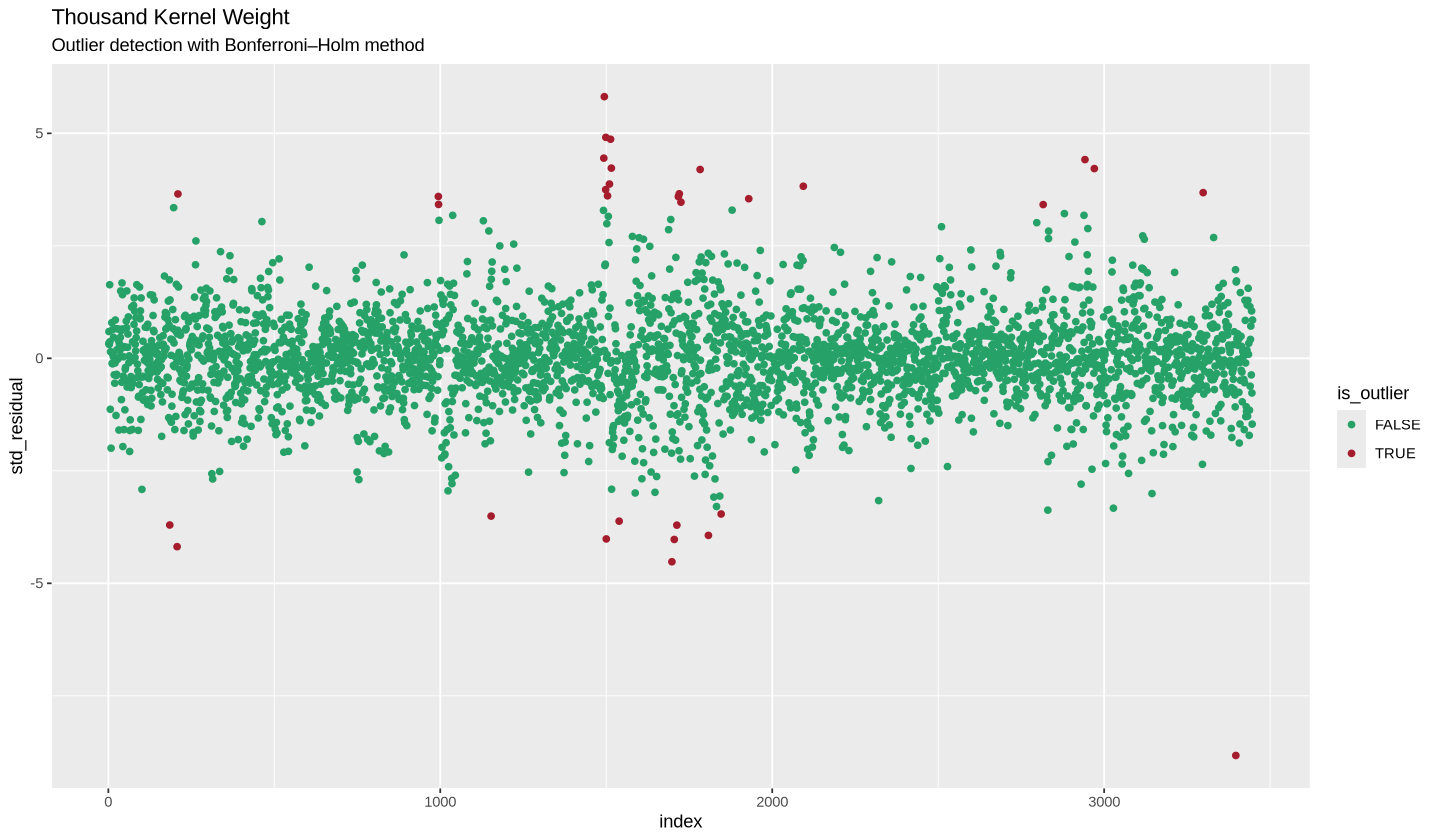

In [28]:
result_BH_WB_HT <- make_BH_multtest(asreml_res_WB_HT)
result_BH_WB_PH <- make_BH_multtest(asreml_res_WB_PH)
result_BH_WB_TKW <- make_BH_multtest(asreml_res_WB_TKW)

30 outlier value(s) detected for trait Days To Heading 
3 outlier value(s) detected for trait Plant Height 


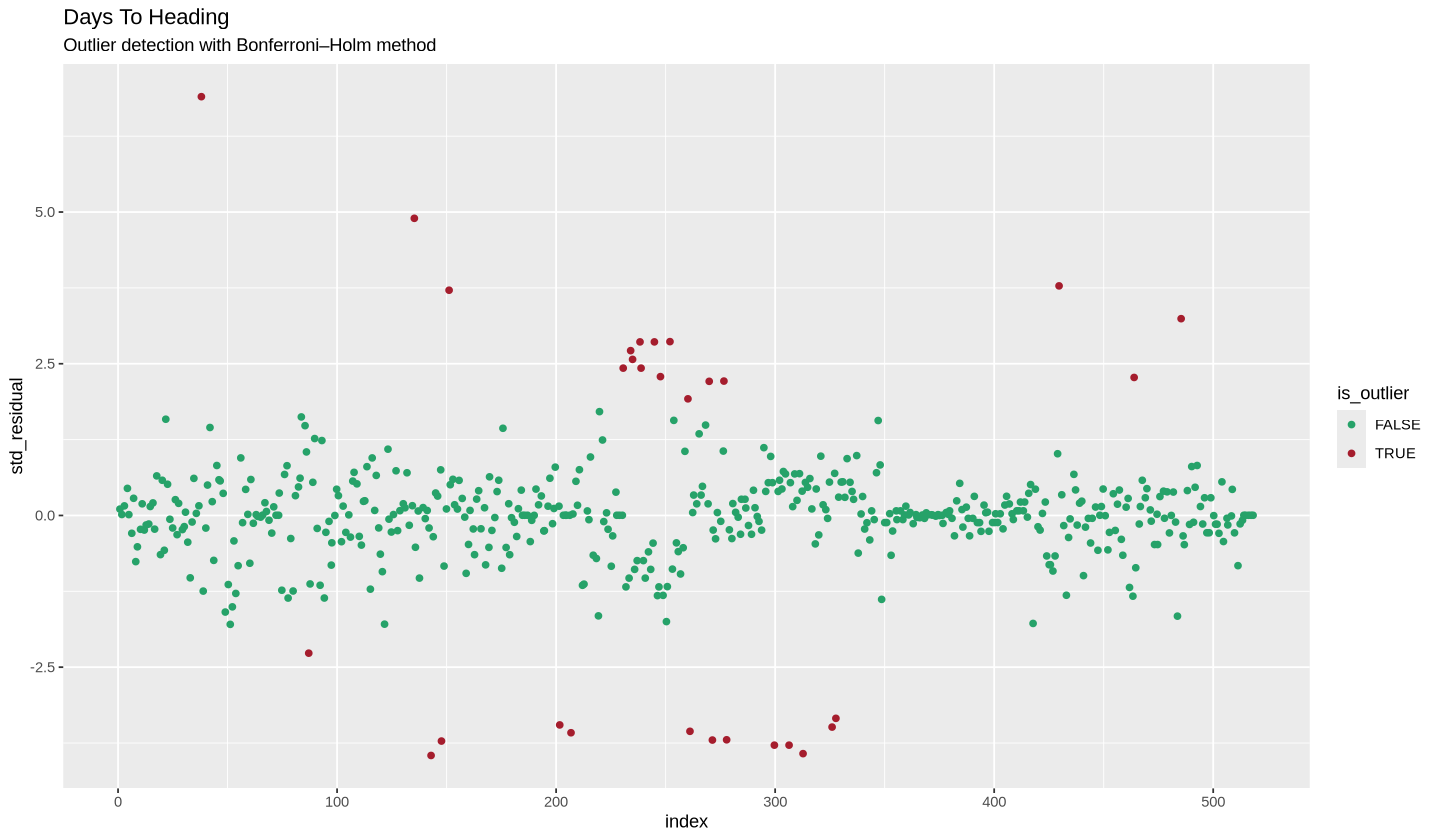

4 outlier value(s) detected for trait Thousand Kernel Weight 


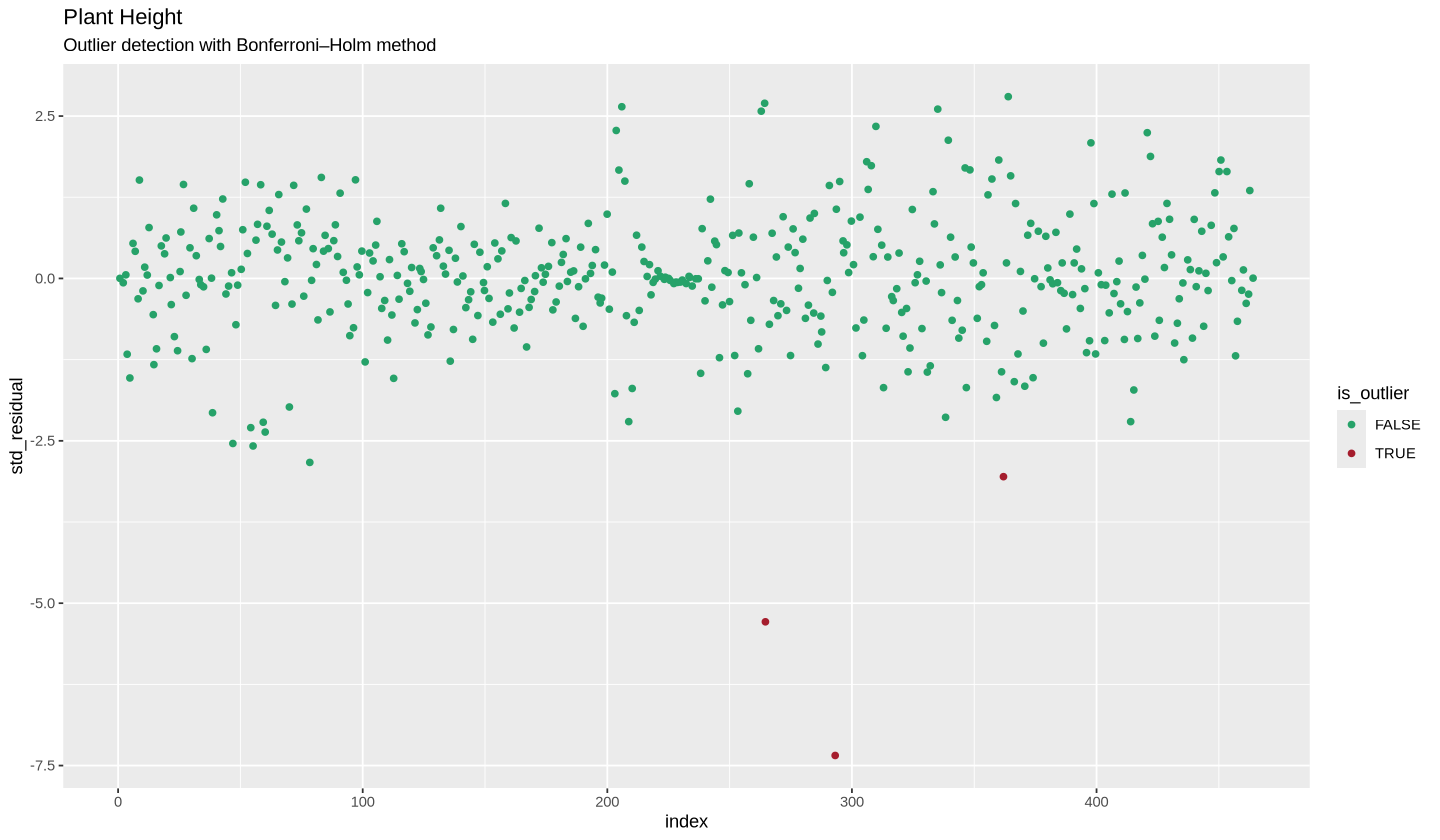

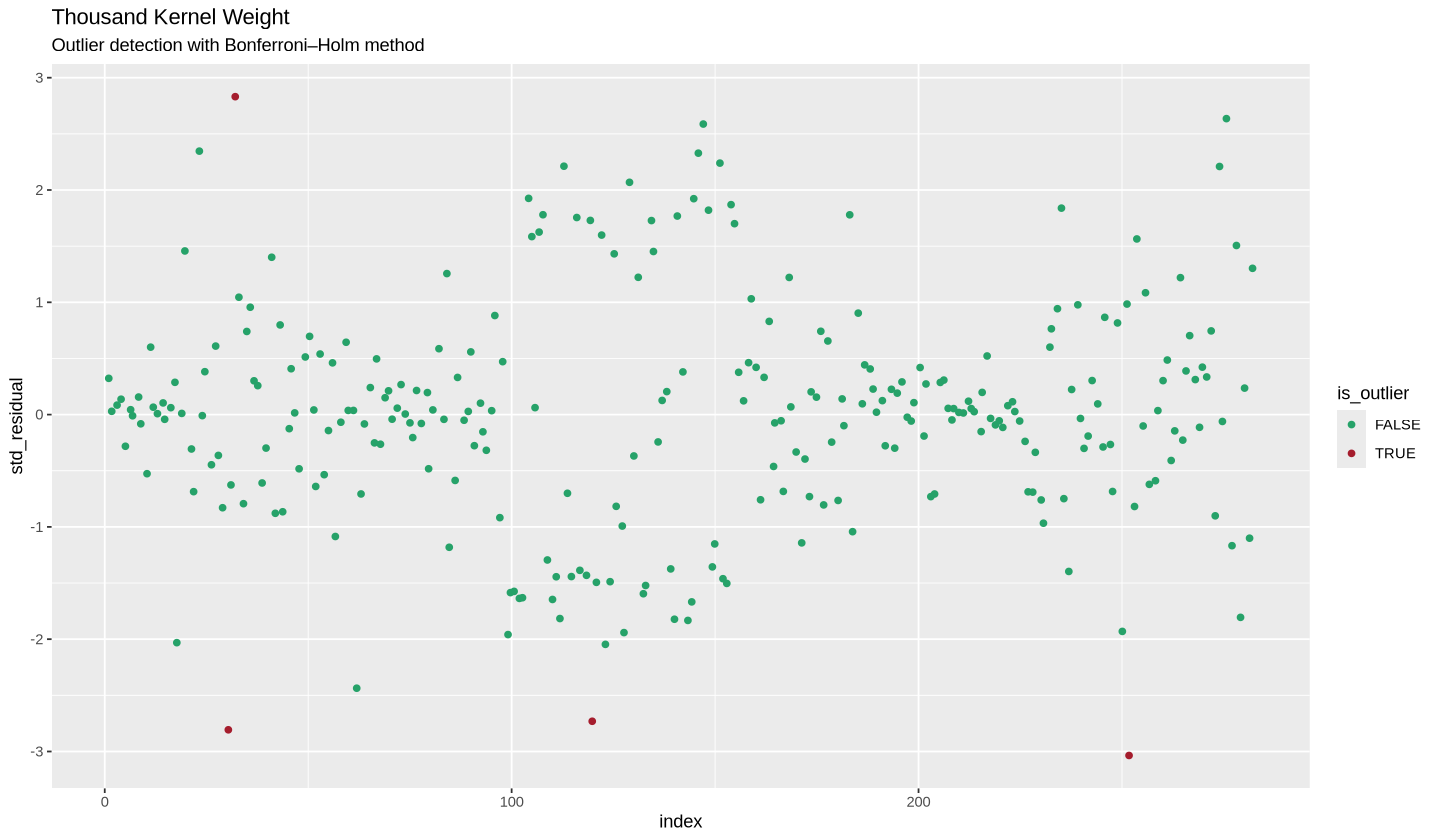

In [29]:
result_BH_SB_HT <- make_BH_multtest(asreml_res_SB_HT)
result_BH_SB_PH <- make_BH_multtest(asreml_res_SB_PH)
result_BH_SB_TKW <- make_BH_multtest(asreml_res_SB_TKW)

In [30]:
data_corrected_WB_HT_II <- data_corrected_WB_HT_I |> correct_II(result_BH_WB_HT)
data_corrected_WB_PH_II <- data_corrected_WB_PH_I |> correct_II(result_BH_WB_PH)
data_corrected_WB_TKW_II <- data_corrected_WB_TKW_I |> correct_II(result_BH_WB_TKW)

In [31]:
data_corrected_SB_HT_II <- data_corrected_SB_HT_I |> correct_II(result_BH_SB_HT)
data_corrected_SB_PH_II <- data_corrected_SB_PH_I |> correct_II(result_BH_SB_PH)
data_corrected_SB_TKW_II <- data_corrected_SB_TKW_I |> correct_II(result_BH_SB_TKW)

## Calculate heritability

In [32]:
asreml_res_h_WB_HT <- asreml(days_to_heading ~1, random = ~accenumb + campaign, 
                   na.action = na.method(x="omit", y="omit"), 
                   residual = ~dsum( ~id(units) | campaign), data = data_corrected_WB_HT_II)

Multi-section model using the sigma parameterization.
ASReml 4.1.0 Mon Apr 22 23:17:01 2024
          LogLik        Sigma2     DF     wall    cpu
 1     -5893.842           1.0   3483 23:17:01    0.0
 2     -5762.945           1.0   3483 23:17:01    0.0
 3     -5628.526           1.0   3483 23:17:01    0.0
 4     -5545.588           1.0   3483 23:17:01    0.0
 5     -5503.026           1.0   3483 23:17:01    0.0
 6     -5488.161           1.0   3483 23:17:01    0.0
 7     -5484.266           1.0   3483 23:17:01    0.0
 8     -5483.767           1.0   3483 23:17:01    0.0
 9     -5483.752           1.0   3483 23:17:01    0.0


In [33]:
asreml_res_h_WB_PH <- asreml(plant_height ~1, random = ~accenumb + campaign, 
                   na.action = na.method(x="omit", y="omit"), 
                   residual = ~dsum( ~id(units) | campaign), data = data_corrected_WB_PH_II)

Multi-section model using the sigma parameterization.
ASReml 4.1.0 Mon Apr 22 23:17:01 2024
          LogLik        Sigma2     DF     wall    cpu
 1      -903.351           1.0    288 23:17:01    0.0 (1 restrained)
 2      -879.703           1.0    288 23:17:01    0.0 (1 restrained)
 3      -854.976           1.0    288 23:17:01    0.0 (1 restrained)
 4      -841.281           1.0    288 23:17:01    0.0 (1 restrained)
 5      -836.303           1.0    288 23:17:01    0.0 (1 restrained)
 6      -835.241           1.0    288 23:17:01    0.0
 7      -835.047           1.0    288 23:17:01    0.0
 8      -835.036           1.0    288 23:17:01    0.0
 9      -835.035           1.0    288 23:17:01    0.0


Warning message in asreml(plant_height ~ 1, random = ~accenumb + campaign, na.action = na.method(x = "omit", :
“Some components changed by more than 1% on the last iteration.”


In [34]:
asreml_res_h_WB_TKW <- asreml(thousand_kernel_weight ~1, random = ~accenumb + campaign, 
                    na.action = na.method(x="omit", y="omit"),
                    residual = ~dsum( ~id(units) | campaign), data = data_corrected_WB_TKW_II)

Multi-section model using the sigma parameterization.
ASReml 4.1.0 Mon Apr 22 23:17:01 2024
          LogLik        Sigma2     DF     wall    cpu
 1     -6672.615           1.0   3413 23:17:01    0.0
 2     -6528.647           1.0   3413 23:17:01    0.0
 3     -6384.936           1.0   3413 23:17:01    0.0
 4     -6305.219           1.0   3413 23:17:01    0.0
 5     -6272.830           1.0   3413 23:17:01    0.0
 6     -6264.676           1.0   3413 23:17:01    0.0
 7     -6262.791           1.0   3413 23:17:01    0.0
 8     -6262.459           1.0   3413 23:17:01    0.0
 9     -6262.413           1.0   3413 23:17:01    0.0
10     -6262.410           1.0   3413 23:17:01    0.0


In [35]:
asreml_res_h_SB_HT <- asreml(days_to_heading ~1, random = ~accenumb + campaign, 
                    na.action = na.method(x="omit", y="omit"), 
                    residual = ~dsum( ~id(units) | campaign), data = data_corrected_SB_HT_II)

Multi-section model using the sigma parameterization.
ASReml 4.1.0 Mon Apr 22 23:17:01 2024
          LogLik        Sigma2     DF     wall    cpu
 1     -1211.114           1.0    486 23:17:01    0.0 (1 restrained)
 2     -1151.002           1.0    486 23:17:01    0.0 (1 restrained)
 3     -1087.768           1.0    486 23:17:01    0.0 (1 restrained)
 4     -1046.182           1.0    486 23:17:01    0.0 (4 restrained)
 5     -1027.234           1.0    486 23:17:01    0.0 (4 restrained)
 6     -1019.003           1.0    486 23:17:01    0.0 (3 restrained)
 7     -1015.638           1.0    486 23:17:01    0.0 (3 restrained)
 8     -1014.206           1.0    486 23:17:01    0.0
 9     -1013.168           1.0    486 23:17:01    0.0
10     -1012.525           1.0    486 23:17:01    0.0
11     -1012.159           1.0    486 23:17:01    0.0
12     -1011.988           1.0    486 23:17:01    0.0
13     -1011.918           1.0    486 23:17:01    0.0


Warning message in asreml(days_to_heading ~ 1, random = ~accenumb + campaign, na.action = na.method(x = "omit", :
“Log-likelihood not converged”
Warning message in asreml(days_to_heading ~ 1, random = ~accenumb + campaign, na.action = na.method(x = "omit", :
“Some components changed by more than 1% on the last iteration.”


In [36]:
asreml_res_h_SB_PH <- asreml(plant_height ~1, random = ~accenumb + campaign, 
                   na.action = na.method(x="omit", y="omit"), 
                   residual = ~dsum( ~id(units) | campaign), data = data_corrected_SB_PH_II)

Multi-section model using the sigma parameterization.
ASReml 4.1.0 Mon Apr 22 23:17:01 2024
          LogLik        Sigma2     DF     wall    cpu
 1     -1359.388           1.0    460 23:17:02    0.0 (1 restrained)
 2     -1324.633           1.0    460 23:17:02    0.0
 3     -1289.779           1.0    460 23:17:02    0.0
 4     -1268.540           1.0    460 23:17:02    0.0
 5     -1256.454           1.0    460 23:17:02    0.0
 6     -1251.493           1.0    460 23:17:02    0.0
 7     -1250.290           1.0    460 23:17:02    0.0
 8     -1250.118           1.0    460 23:17:02    0.0
 9     -1250.100           1.0    460 23:17:02    0.0
10     -1250.098           1.0    460 23:17:02    0.0


In [37]:
asreml_res_h_SB_TKW <- asreml(thousand_kernel_weight ~1, random = ~accenumb + campaign, 
                     na.action = na.method(x="omit", y="omit"),
                     residual = ~dsum( ~id(units) | campaign), data = data_corrected_SB_TKW_II)

Multi-section model using the sigma parameterization.
ASReml 4.1.0 Mon Apr 22 23:17:02 2024
          LogLik        Sigma2     DF     wall    cpu
 1      -575.941           1.0    277 23:17:02    0.0
 2      -553.264           1.0    277 23:17:02    0.0
 3      -529.054           1.0    277 23:17:02    0.0 (1 restrained)
 4      -515.729           1.0    277 23:17:02    0.0
 5      -510.108           1.0    277 23:17:02    0.0
 6      -509.063           1.0    277 23:17:02    0.0
 7      -508.939           1.0    277 23:17:02    0.0
 8      -508.929           1.0    277 23:17:02    0.0
 9      -508.928           1.0    277 23:17:02    0.0
10      -508.927           1.0    277 23:17:02    0.0


Warning message in asreml(thousand_kernel_weight ~ 1, random = ~accenumb + campaign, :
“Some components changed by more than 1% on the last iteration.”


In [38]:
quality_WB_HT <- get_quality(data_sub_WB_HT, asreml_res_h_WB_HT)
quality_WB_PH <- get_quality(data_sub_WB_PH, asreml_res_h_WB_PH)
quality_WB_TKW <- get_quality(data_sub_WB_TKW, asreml_res_h_WB_TKW)
quality_WB_all <- bind_rows(quality_WB_HT, quality_WB_PH, quality_WB_TKW) |> mutate(across(-1, \(x) round(x, 3)))
write_csv(quality_WB_all,"NARDI_winter_barley_data_quality.csv")

days_to_heading heritability: 61.1 %
plant_height heritability: 9.1 %
thousand_kernel_weight heritability: 75.7 %


In [39]:
quality_SB_HT <- get_quality(data_sub_SB_HT, asreml_res_h_SB_HT)
quality_SB_PH <- get_quality(data_sub_SB_PH, asreml_res_h_SB_PH)
quality_SB_TKW <- get_quality(data_sub_SB_TKW, asreml_res_h_SB_TKW)
quality_SB_all <- bind_rows(quality_SB_HT, quality_SB_PH, quality_SB_TKW) |> mutate(across(-1, \(x) round(x, 3)))
write_csv(quality_SB_all,"NARDI_spring_barley_data_quality.csv")

days_to_heading heritability: 89.8 %
plant_height heritability: 91.2 %
thousand_kernel_weight heritability: 58.3 %


## Run linear mixed model with outlier corrected data

In [40]:
asreml_data_WB_HT <- asreml(days_to_heading ~accenumb, random = ~campaign, 
                         na.action = na.method(x="omit", y="omit"), residual = ~dsum(~id(units) | campaign), 
                         data = data_corrected_WB_HT_II)

Multi-section model using the sigma parameterization.
ASReml 4.1.0 Mon Apr 22 23:17:02 2024
          LogLik        Sigma2     DF     wall    cpu
 1     -4916.764           1.0   2731 23:17:02    0.2
 2     -4783.253           1.0   2731 23:17:02    0.2
 3     -4645.437           1.0   2731 23:17:03    0.2
 4     -4560.860           1.0   2731 23:17:03    0.2
 5     -4519.330           1.0   2731 23:17:03    0.2
 6     -4505.906           1.0   2731 23:17:03    0.2
 7     -4502.602           1.0   2731 23:17:03    0.2
 8     -4502.223           1.0   2731 23:17:03    0.2
 9     -4502.214           1.0   2731 23:17:04    0.2


In [41]:
asreml_data_WB_PH <- asreml(plant_height ~accenumb, random = ~campaign, 
                         na.action = na.method(x="omit", y="omit"), residual = ~dsum(~id(units) | campaign), 
                         data = data_corrected_WB_PH_II)

Multi-section model using the sigma parameterization.
ASReml 4.1.0 Mon Apr 22 23:17:04 2024
          LogLik        Sigma2     DF     wall    cpu
 1      -755.649           1.0    233 23:17:04    0.0 (1 restrained)
 2      -734.258           1.0    233 23:17:04    0.0 (1 restrained)
 3      -712.947           1.0    233 23:17:04    0.0 (1 restrained)
 4      -700.637           1.0    233 23:17:04    0.0 (1 restrained)
 5      -695.330           1.0    233 23:17:04    0.0
 6      -694.005           1.0    233 23:17:04    0.0
 7      -693.793           1.0    233 23:17:04    0.0
 8      -693.781           1.0    233 23:17:04    0.0
 9      -693.780           1.0    233 23:17:04    0.0


In [42]:
asreml_data_WB_TKW <- asreml(thousand_kernel_weight ~accenumb, random = ~campaign, 
                           na.action = na.method(x="omit", y="omit"), residual = ~dsum(~id(units) | campaign), 
                           data = data_corrected_WB_TKW_II)

Multi-section model using the sigma parameterization.
ASReml 4.1.0 Mon Apr 22 23:17:04 2024
          LogLik        Sigma2     DF     wall    cpu
 1     -5366.512           1.0   2730 23:17:04    0.2
 2     -5265.945           1.0   2730 23:17:04    0.1 (1 restrained)
 3     -5170.265           1.0   2730 23:17:04    0.1 (1 restrained)
 4     -5116.150           1.0   2730 23:17:05    0.1 (1 restrained)
 5     -5091.201           1.0   2730 23:17:05    0.1 (1 restrained)
 6     -5083.336           1.0   2730 23:17:05    0.1 (1 restrained)
 7     -5080.958           1.0   2730 23:17:05    0.1
 8     -5080.294           1.0   2730 23:17:05    0.1
 9     -5080.138           1.0   2730 23:17:05    0.1
10     -5080.119           1.0   2730 23:17:05    0.1
11     -5080.118           1.0   2730 23:17:05    0.1


In [43]:
asreml_data_SB_HT <- asreml(days_to_heading ~accenumb, random = ~campaign, 
                          na.action = na.method(x="omit", y="omit"), residual = ~dsum(~id(units) | campaign), 
                          data = data_corrected_SB_HT_II)

Multi-section model using the sigma parameterization.
ASReml 4.1.0 Mon Apr 22 23:17:06 2024
          LogLik        Sigma2     DF     wall    cpu
 1      -967.610           1.0    383 23:17:06    0.0 (2 restrained)
 2      -905.534           1.0    383 23:17:06    0.0 (2 restrained)
 3      -838.638           1.0    383 23:17:06    0.0 (4 restrained)
 4      -794.034           1.0    383 23:17:06    0.0 (3 restrained)
 5      -773.556           1.0    383 23:17:06    0.0 (4 restrained)
 6      -765.266           1.0    383 23:17:06    0.0 (3 restrained)
 7      -762.453           1.0    383 23:17:06    0.0 (1 restrained)
 8      -761.628           1.0    383 23:17:06    0.0 (1 restrained)
 9      -761.572           1.0    383 23:17:06    0.0
10      -761.567           1.0    383 23:17:06    0.0
11      -761.564           1.0    383 23:17:06    0.0
12      -761.564           1.0    383 23:17:06    0.0
13      -761.563           1.0    383 23:17:06    0.0


Warning message in asreml(days_to_heading ~ accenumb, random = ~campaign, na.action = na.method(x = "omit", :
“Log-likelihood not converged”


In [44]:
asreml_data_SB_PH <- asreml(plant_height ~accenumb, random = ~campaign, 
                         na.action = na.method(x="omit", y="omit"), residual = ~dsum(~id(units) | campaign), 
                         data = data_corrected_SB_PH_II)

Multi-section model using the sigma parameterization.
ASReml 4.1.0 Mon Apr 22 23:17:06 2024
          LogLik        Sigma2     DF     wall    cpu
 1     -1075.881           1.0    373 23:17:06    0.0 (2 restrained)
 2     -1045.959           1.0    373 23:17:06    0.0 (1 restrained)
 3     -1016.539           1.0    373 23:17:06    0.0 (1 restrained)
 4      -998.355           1.0    373 23:17:06    0.0 (1 restrained)
 5      -989.598           1.0    373 23:17:06    0.0 (1 restrained)
 6      -987.010           1.0    373 23:17:06    0.0 (1 restrained)
 7      -986.465           1.0    373 23:17:06    0.0
 8      -986.417           1.0    373 23:17:06    0.0
 9      -986.416           1.0    373 23:17:06    0.0


In [45]:
asreml_data_SB_TKW <- asreml(thousand_kernel_weight ~accenumb, random = ~campaign, 
                           na.action = na.method(x="omit", y="omit"), residual = ~dsum(~id(units) | campaign), 
                           data = data_corrected_SB_TKW_II)

Multi-section model using the sigma parameterization.
ASReml 4.1.0 Mon Apr 22 23:17:06 2024
          LogLik        Sigma2     DF     wall    cpu
 1      -468.318           1.0    220 23:17:06    0.0 (1 restrained)
 2      -444.239           1.0    220 23:17:06    0.0 (1 restrained)
 3      -423.394           1.0    220 23:17:06    0.0 (1 restrained)
 4      -411.746           1.0    220 23:17:06    0.0 (1 restrained)
 5      -407.610           1.0    220 23:17:06    0.0
 6      -406.984           1.0    220 23:17:06    0.0
 7      -406.933           1.0    220 23:17:06    0.0
 8      -406.932           1.0    220 23:17:06    0.0


## Extract BLUEs and create output file

In [46]:
BLUEs_WB_HT <- get_BLUEs(asreml_data_WB_HT)
BLUEs_WB_PH <- get_BLUEs(asreml_data_WB_PH)
BLUEs_WB_TKW <- get_BLUEs(asreml_data_WB_TKW)

BLUE_WB_all <- genotypes_w |> 
                        left_join(BLUEs_WB_HT, by="genotype") |> 
                        left_join(BLUEs_WB_PH, by="genotype") |> 
                        left_join(BLUEs_WB_TKW, by="genotype") |> 
                        arrange(genotype) |> mutate(across(-1, \(x) round(x, 2)))

write_csv(BLUE_WB_all,"NARDI_winter_barley_BLUE_values.csv")
summary(BLUE_WB_all)

   genotype         days_to_heading_BLUE plant_height_BLUE
 Length:880         Min.   :124.2        Min.   : 75.24   
 Class :character   1st Qu.:129.7        1st Qu.: 83.48   
 Mode  :character   Median :131.6        Median : 96.99   
                    Mean   :131.2        Mean   : 94.76   
                    3rd Qu.:132.7        3rd Qu.:104.38   
                    Max.   :136.8        Max.   :123.20   
                    NA's   :127          NA's   :824      
 thousand_kernel_weight_BLUE
 Min.   :28.20              
 1st Qu.:38.25              
 Median :40.48              
 Mean   :40.63              
 3rd Qu.:42.70              
 Max.   :52.47              
 NA's   :196                

In [47]:
BLUEs_SB_HT <- get_BLUEs(asreml_data_SB_HT)
BLUEs_SB_PH <- get_BLUEs(asreml_data_SB_PH)
BLUEs_SB_TKW <- get_BLUEs(asreml_data_SB_TKW)


BLUE_SB_all <- genotypes_s |> 
                        left_join(BLUEs_SB_HT, by="genotype") |> 
                        left_join(BLUEs_SB_PH, by="genotype") |> 
                        left_join(BLUEs_SB_TKW, by="genotype") |> 
                        arrange(genotype) |> mutate(across(-1, \(x) round(x, 2)))

write_csv(BLUE_SB_all,"NARDI_spring_barley_BLUE_values.csv")
summary(BLUE_SB_all)

   genotype         days_to_heading_BLUE plant_height_BLUE
 Length:501         Min.   :122.9        Min.   : 39.24   
 Class :character   1st Qu.:148.6        1st Qu.: 64.18   
 Mode  :character   Median :151.2        Median : 75.92   
                    Mean   :148.8        Mean   : 73.48   
                    3rd Qu.:152.9        3rd Qu.: 84.34   
                    Max.   :157.1        Max.   :100.49   
                    NA's   :397          NA's   :413      
 thousand_kernel_weight_BLUE
 Min.   :27.20              
 1st Qu.:38.84              
 Median :41.89              
 Mean   :41.41              
 3rd Qu.:44.16              
 Max.   :50.54              
 NA's   :443                

In [48]:
library(rmarkdown)
convert_ipynb("NARDI_historic_barley_data_analysis.ipynb")

In [49]:
sessionInfo()

R version 4.3.3 (2024-02-29)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Fedora Linux 40.20240419.n.0 (Silverblue)

Matrix products: default
BLAS/LAPACK: /var/home/erwan/.conda/envs/R/lib/libopenblasp-r0.3.27.so;  LAPACK version 3.12.0

locale:
 [1] LC_CTYPE=C.UTF-8       LC_NUMERIC=C           LC_TIME=C.UTF-8       
 [4] LC_COLLATE=C.UTF-8     LC_MONETARY=C.UTF-8    LC_MESSAGES=C.UTF-8   
 [7] LC_PAPER=C.UTF-8       LC_NAME=C              LC_ADDRESS=C          
[10] LC_TELEPHONE=C         LC_MEASUREMENT=C.UTF-8 LC_IDENTIFICATION=C   

time zone: Europe/Paris
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] rmarkdown_2.26      asreml_4.1.0.154    Matrix_1.6-5       
 [4] multtest_2.58.0     Biobase_2.62.0      BiocGenerics_0.48.1
 [7] lubridate_1.9.3     forcats_1.0.0       stringr_1.5.1      
[10] dplyr_1.1.4         purrr_1.0.2         readr_2.1.5        
[13] t